In [8]:
library(lme4) # necessary for model fitting: glm
library(effects) # necessary for making effect plots
library(blmeco)

Loading required package: Matrix
Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.
Loading required package: MASS


# Statistics based on correspondent connection types

The frequencies in the columns (e.g. "hit_freq") represent the number of divine appeals per 100,000 words of total words per correspondent connection type.

In [191]:
marescoe_conn <- read.delim(file = "stats_marescoe-david.tsv", sep = "\t", header = T)

In [192]:
head(marescoe_conn)

str(marescoe_conn)

id,hit_freq,conf_freq,approve_freq,fixed_freq,object_freq,grat_freq,pray_freq,preserve_freq,presupp_freq,...,addressee_birth_date,sender_generation,addressee_generation,sender_is_older,sender_over_40,addressee_over_40,age_gap_over_20,gender_sender,gender_addressee,gender_pair
SB_185,0.00,0,0,0.00,0,0,0,0,0,...,MULT,UNK,1600-1640,UNK,UNK,FALSE,UNK,MALE,MULT,MALE-MULT
SB_M_1,0.00,0,0,0.00,0,0,0,0,0,...,MULT,UNK,1600-1640,MULT,MULT,MULT,UNK,MALE,MALE,MALE-MALE
SB_M_102,0.00,0,0,0.00,0,0,0,0,0,...,1633,UNK,1600-1640,MULT,MULT,FALSE,UNK,MALE,MALE,MALE-MALE
SB_M_103,0.00,0,0,0.00,0,0,0,0,0,...,1633,UNK,1600-1640,UNK,UNK,FALSE,UNK,MALE,MALE,MALE-MALE
SB_M_105,2.34,0,0,2.34,0,0,0,0,0,...,1633,UNK,1600-1640,UNK,UNK,FALSE,UNK,MALE,MALE,MALE-MALE
SB_M_11,0.00,0,0,0.00,0,0,0,0,0,...,1633,UNK,1600-1640,MULT,MULT,FALSE,UNK,MALE,MALE,MALE-MALE


'data.frame':	481 obs. of  34 variables:
 $ id                  : Factor w/ 481 levels "455","456","457",..: 4 6 10 11 13 18 21 27 33 38 ...
 $ hit_freq            : num  0 0 0 0 2.34 0 0 2.34 4.68 0 ...
 $ conf_freq           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ approve_freq        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fixed_freq          : num  0 0 0 0 2.34 0 0 0 0 0 ...
 $ object_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ grat_freq           : num  0 0 0 0 0 0 0 2.34 2.34 0 ...
 $ pray_freq           : num  0 0 0 0 0 0 0 0 2.34 0 ...
 $ preserve_freq       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ presupp_freq        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ resign_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ travel_freq         : num  0 0 0 0 0 0 0 0 4.68 0 ...
 $ trade_freq          : num  0 0 0 0 2.34 0 0 2.34 0 0 ...
 $ health_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ politics_freq       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ social_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ connection      

In [193]:
marescoe_conn <- na.omit(marescoe_conn[!is.na(marescoe_conn$year), ])

In [194]:
marescoe_conn$year <- as.factor(marescoe_conn$year)
str(marescoe_conn$year)

marescoe_conn <- na.omit(marescoe_conn[!is.na(marescoe_conn$year), ])

 Factor w/ 16 levels "1656","1657",..: 8 4 5 5 5 4 5 5 5 6 ...


In [195]:
# test for data independence

length(marescoe_conn$id)
length(unique(marescoe_conn$id))

length(marescoe_conn$id) == length(unique(marescoe_conn$id))

[1] 476

[1] 476

[1] TRUE

In [4]:
# test for normality

shapiro.test(marescoe_conn$hit_freq)


	Shapiro-Wilk normality test

data:  marescoe_conn$hit_freq
W = 0.38797, p-value < 2.2e-16


The data is not normally distributed. 

### 1 Generalised linear model using "connection" as a predictor and "hit_freq" as response variable

In [102]:
m_conn_model <- glm(hit_freq ~ connection,
                    data=marescoe_conn,
                    family=quasipoisson)

summary(m_conn_model)
summary(m_conn_model)$coef


Call:
glm(formula = hit_freq ~ connection, family = quasipoisson, data = marescoe_conn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7168  -1.3266  -1.2300   0.8693   7.5238  

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -0.12783    0.21071  -0.607 0.544354    
connectionBUSINESS; CLIENT        -0.01344    0.28320  -0.047 0.962156    
connectionBUSINESS; CORRESPONDENT  1.04526    0.27659   3.779 0.000178 ***
connectionBUSINESS; PRINCIPAL     -0.15134    0.28495  -0.531 0.595582    
connectionFAMILY                   2.53695    0.27623   9.184  < 2e-16 ***
connectionFRIEND                   2.39194    0.28510   8.390 5.74e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 4.258686)

    Null deviance: 2336.2  on 475  degrees of freedom
Residual deviance: 1623.5  on 470  degrees of freedom
AIC: NA

Num

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.12783337,0.2107086,-0.60668311,5.443542e-01
connectionBUSINESS; CLIENT,-0.01344432,0.2831968,-0.04747341,9.621561e-01
connectionBUSINESS; CORRESPONDENT,1.04525554,0.2765909,3.77906667,1.776596e-04
connectionBUSINESS; PRINCIPAL,-0.15134466,0.2849501,-0.53112697,5.955817e-01
connectionFAMILY,2.53695329,0.2762260,9.18434080,1.327014e-18
connectionFRIEND,2.39193748,0.2850955,8.38995151,5.739197e-16


In [103]:
"------------------------------drop1------------------------------"
drop1(m_conn_model, test = "LR")

"------------------------------anova------------------------------"
simpler_m_conn <- glm(hit_freq ~ 1,
                      data=marescoe_conn,
                      family=quasipoisson)
anova(simpler_m_conn, m_conn_model, test = "LR")

[1] "------------------------------drop1------------------------------"

,Df,Deviance,scaled dev.,Pr(>Chi)
<none>,NA,1623.484,NA,NA
connection,5,2336.206,167.3573,2.672268e-34


[1] "------------------------------anova------------------------------"

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
475,2336.206,NA,NA,NA
470,1623.484,5,712.722,2.672268e-34


In [104]:
effect("connection", m_conn_model)


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.8800000               0.8682482               2.5028302 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.7564052              11.1241667               9.6225000 

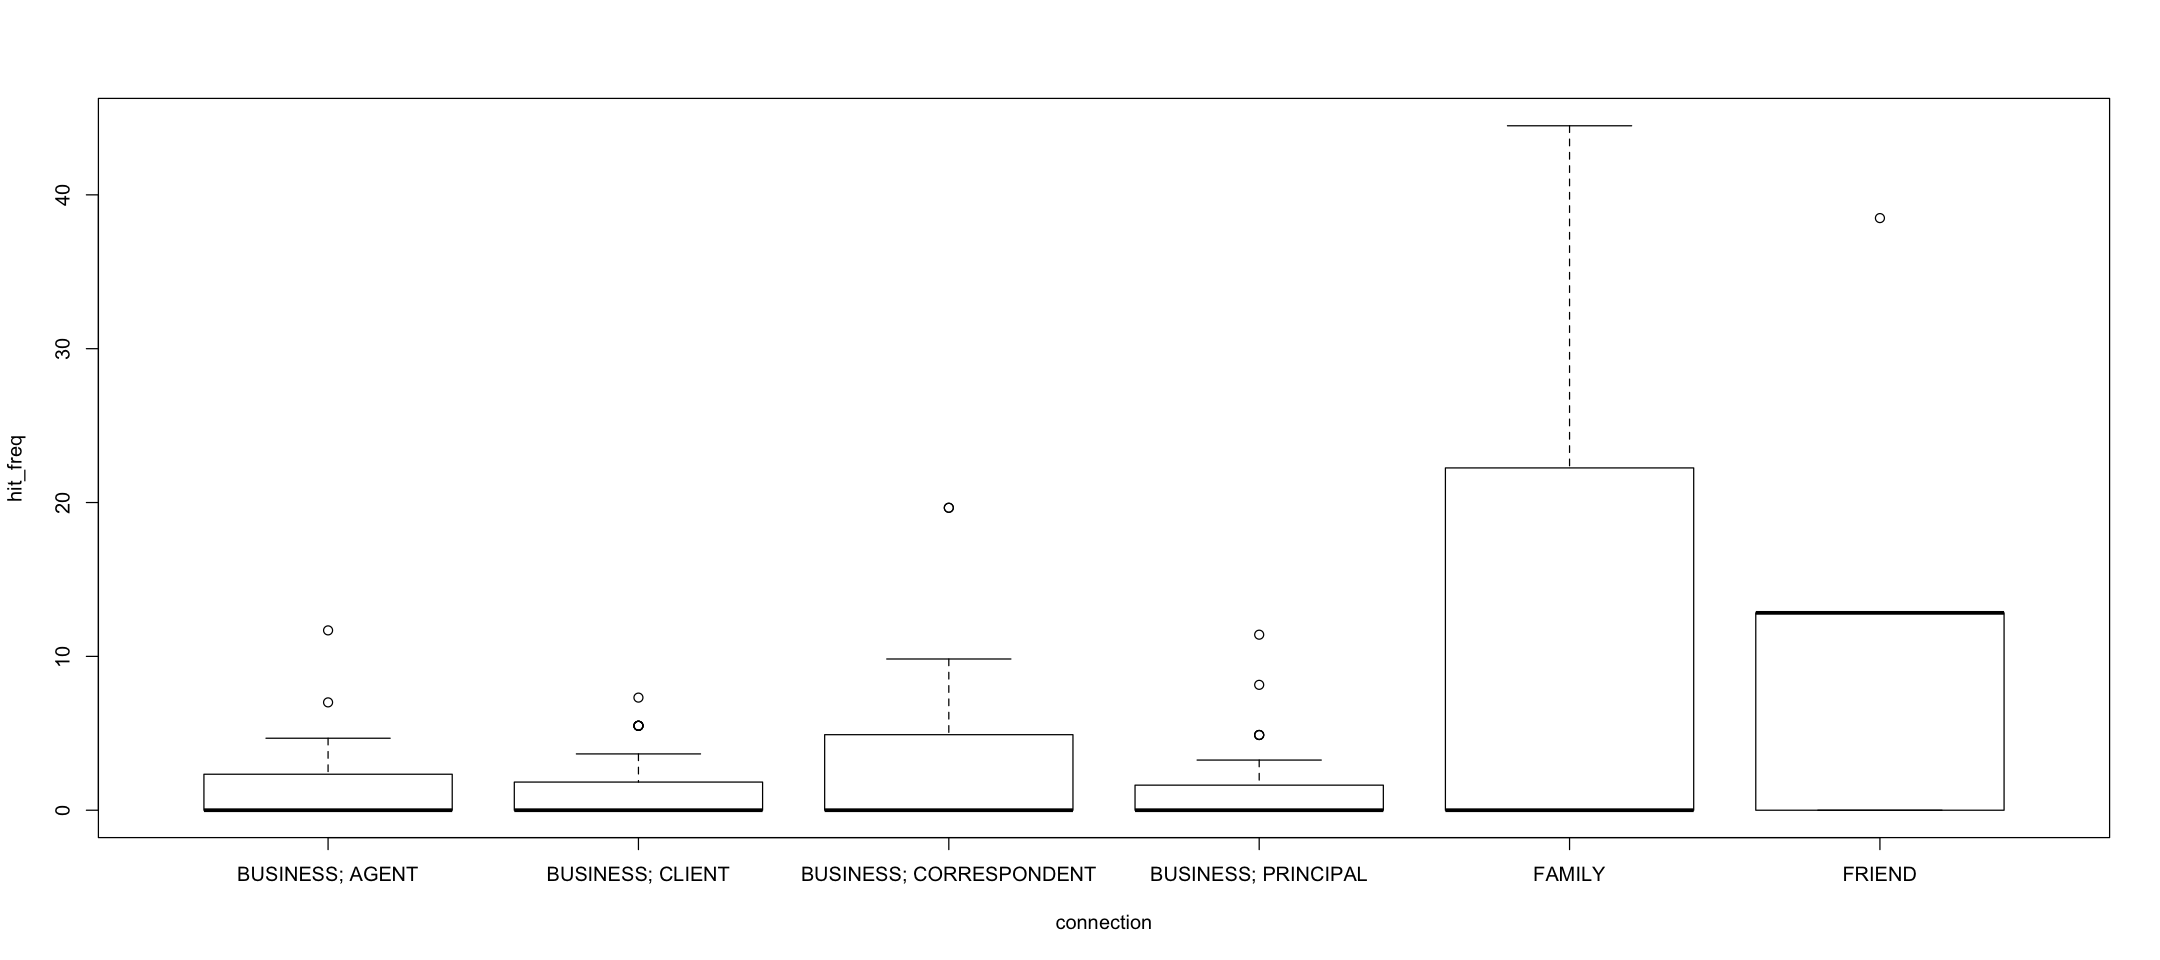

In [106]:
plot(hit_freq ~ connection, data=marescoe_conn)

par(cex.axis = 0.6)

options(repr.plot.width = 18, repr.plot.height = 8)

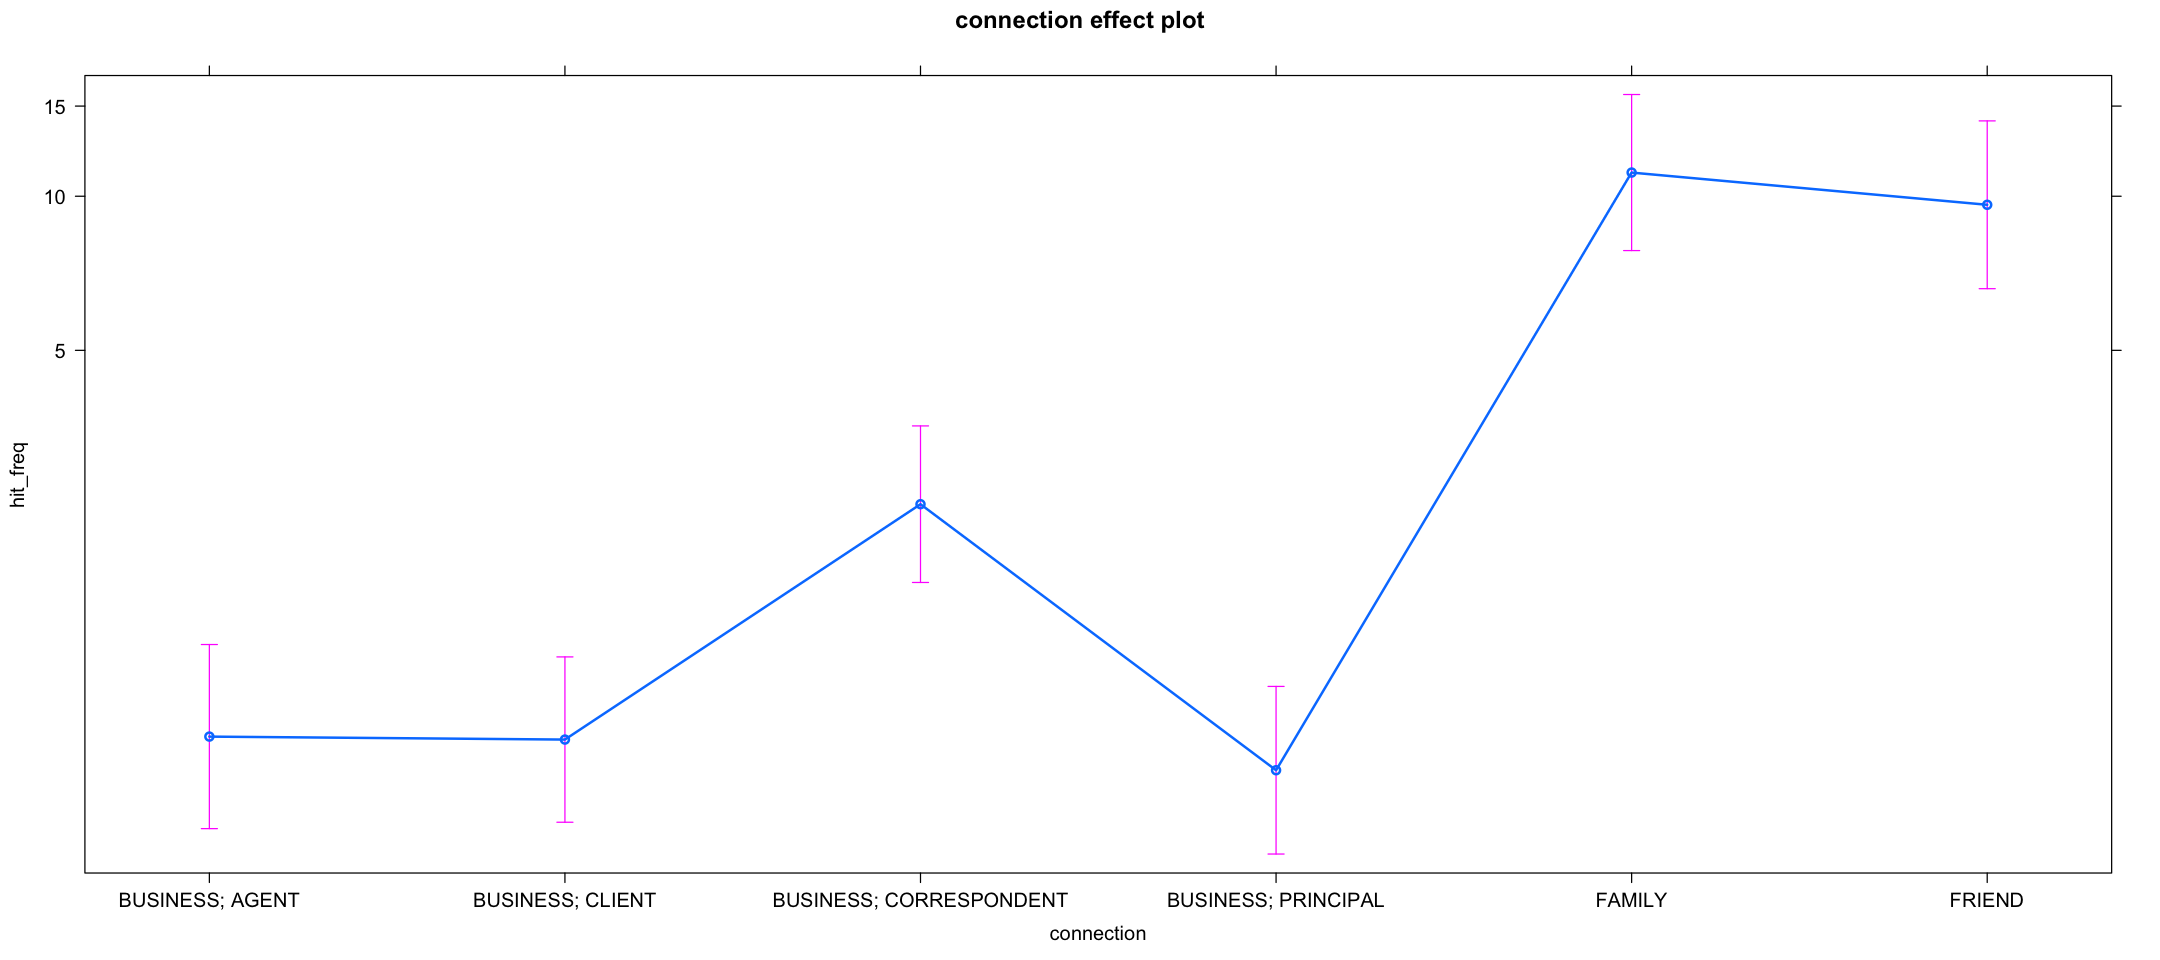

In [107]:
plot(effect("connection", m_conn_model))
 
par(cex.axis = 0.8)

# Increase the resolution of the plot (in inches)
options(repr.plot.width = 12, repr.plot.height = 6)

"BUSINESS;CORRESPONDENT", "FAMILY", and "FRIEND" are significant predictors for an increase of number of divine appeals used in correspondence. 

### 2 Generalised linear model using "connection" as a fixed effect and "sender" as a random effect, negative binomial

In [108]:
# negative binomial models are better at dealing with overdispersed count outcome variables

m_glmer1 <- glmer(hit_freq ~ connection + (1|sender),
                  data=marescoe_conn,
                  family=negative.binomial(theta=1),
                  nAGQ=0L)

summary(m_glmer1)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer1)
"------------------------------drop1------------------------------"
drop1(m_glmer1, test = "Chisq")

effect("connection", m_glmer1)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | sender)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
  1326.7   1360.0   -655.3   1310.7      468 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9540 -0.5908 -0.4686  0.2561  3.9344 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 1.394    1.181   
Number of obs: 476, groups:  sender, 137

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.60447    0.31577  -1.914  0.05558 . 
connectionBUSINESS; CLIENT        -0.05144    0.39773  -0.129  0.89708   
connectionBUSINESS; CORRESPONDENT  0.63802    0.42621   1.497  0.13441   
connectionBUSINESS; PRINCIPAL     -0.10491    0.42585  -0.246  0.80541   
connectionFAMILY                   2.25685    0.72374   3.118

[1] "------------------------------dispersion------------------------------"

[1] 1.013124

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1326.692,NA,NA
connection,5,1336.925,20.23259,0.001130147



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5463616               0.5189649               1.0341148 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4919467               5.2193690               8.3841481 

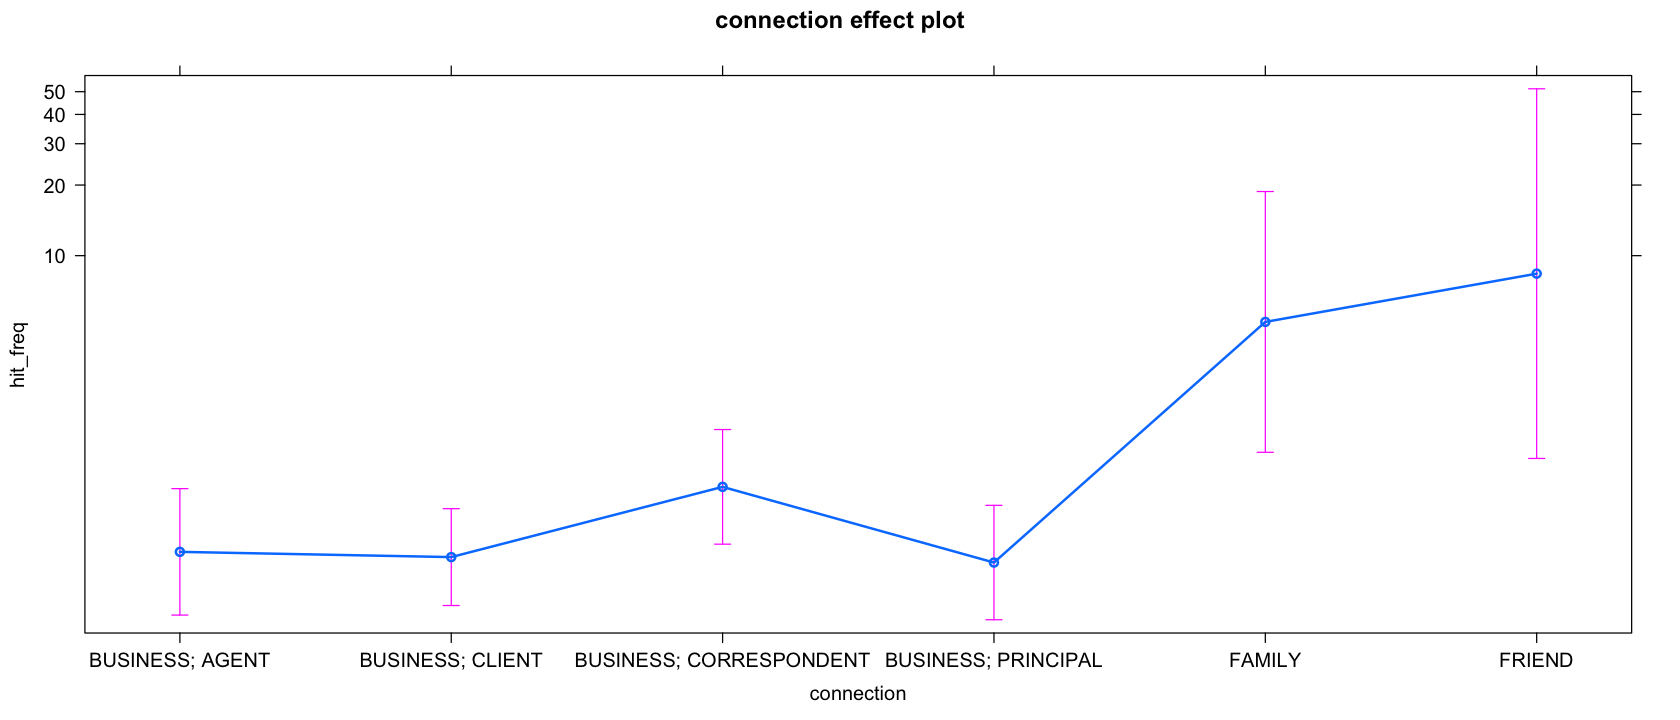

In [137]:
plot(effect("connection", m_glmer1))

par(cex.axis = 0.6)

options(repr.plot.width = 18, repr.plot.height = 6)

The significance of the correspondent variables drops when "sender" is used as random effect. However, FAMILY and FRIEND remain significant and have a high effect on the frequency of divine appeals.

### 3 Generalised linear mixed-effects model using "connection" as a fixed effect and "sender" and "year" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | sender) + (1 | year)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
  1328.7   1366.2   -655.3   1310.7      467 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9540 -0.5908 -0.4686  0.2561  3.9344 

Random effects:
 Groups Name        Variance  Std.Dev. 
 sender (Intercept) 1.394e+00 1.181e+00
 year   (Intercept) 1.954e-16 1.398e-08
Number of obs: 476, groups:  sender, 137; year, 16

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.60451    0.31577  -1.914  0.05557 . 
connectionBUSINESS; CLIENT        -0.05141    0.39773  -0.129  0.89715   
connectionBUSINESS; CORRESPONDENT  0.63809    0.42621   1.497  0.13436   
connectionBUSINESS; PRINCIPAL     -0.10487    0.42585  -0.246  0.805

[1] "------------------------------dispersion------------------------------"

[1] 1.013124

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1328.692,NA,NA
connection,5,1338.926,20.23356,0.001129669



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5463411               0.5189638               1.0341531 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4919468               5.2193695               8.3841481 

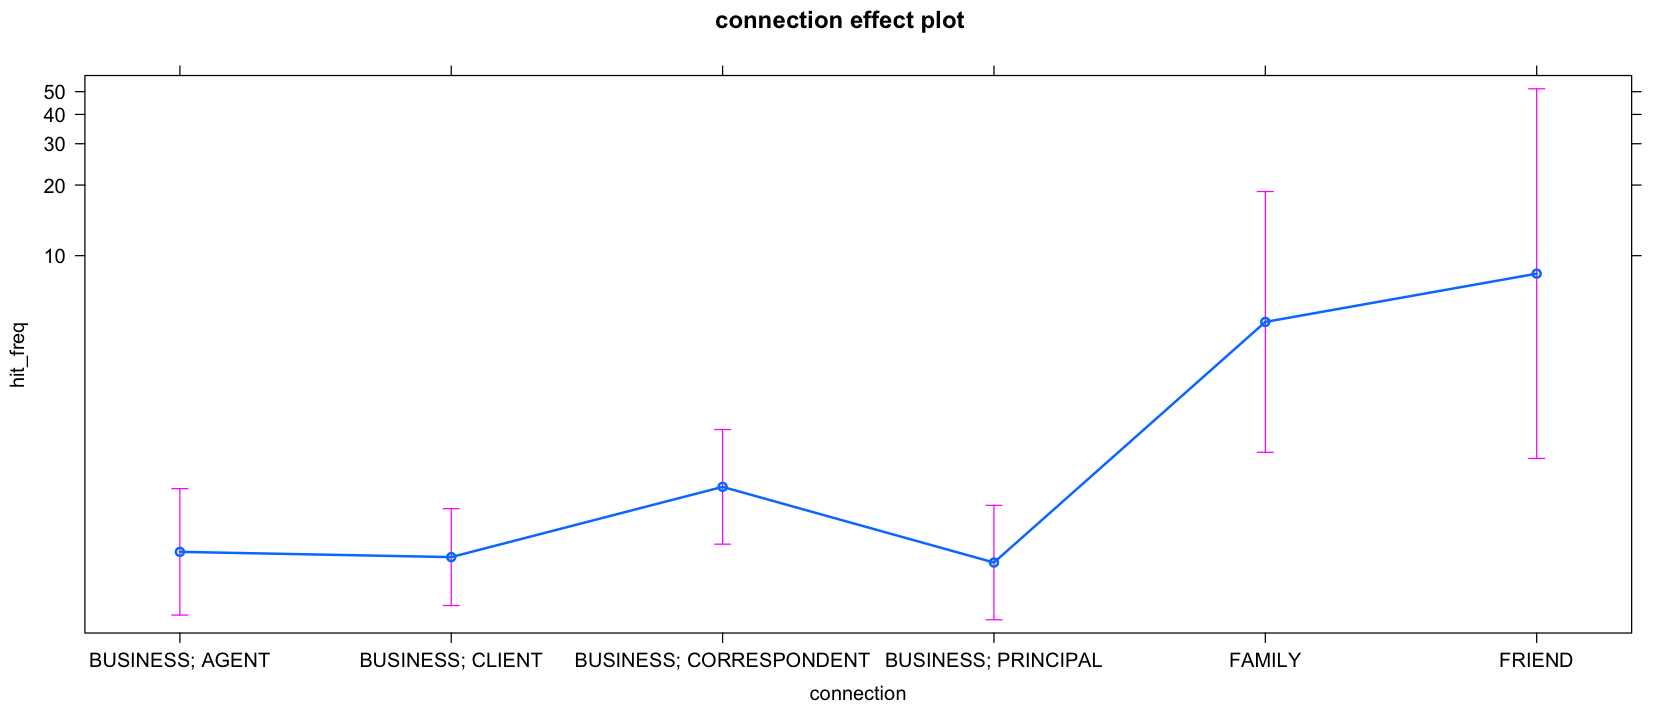

In [190]:
m_glmer2 <- glmer(hit_freq ~ connection + (1|sender) + (1|year),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2)

"------------------------------drop1------------------------------"
drop1(m_glmer2, test = "Chisq")

effect("connection", m_glmer2)

plot(effect("connection", m_glmer2))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The variance of both "sender" and "year" is near zero. Possibly this model is too complex to fit the data.

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | sender) + (1 | quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
  1328.7   1366.2   -655.3   1310.7      467 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9540 -0.5908 -0.4686  0.2561  3.9344 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 sender       (Intercept) 1.394e+00 1.181e+00
 quinquennial (Intercept) 3.088e-15 5.557e-08
Number of obs: 476, groups:  sender, 137; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.60446    0.31576  -1.914  0.05559 . 
connectionBUSINESS; CLIENT        -0.05145    0.39772  -0.129  0.89707   
connectionBUSINESS; CORRESPONDENT  0.63805    0.42621   1.497  0.13438   
connectionBUSINESS; PRINCIPAL     -

[1] "------------------------------dispersion------------------------------"

[1] 1.013126

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1328.692,NA,NA
connection,5,1338.927,20.23575,0.001128601



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5463712               0.5189701               1.0341655 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4919525               5.2194399               8.3841576 

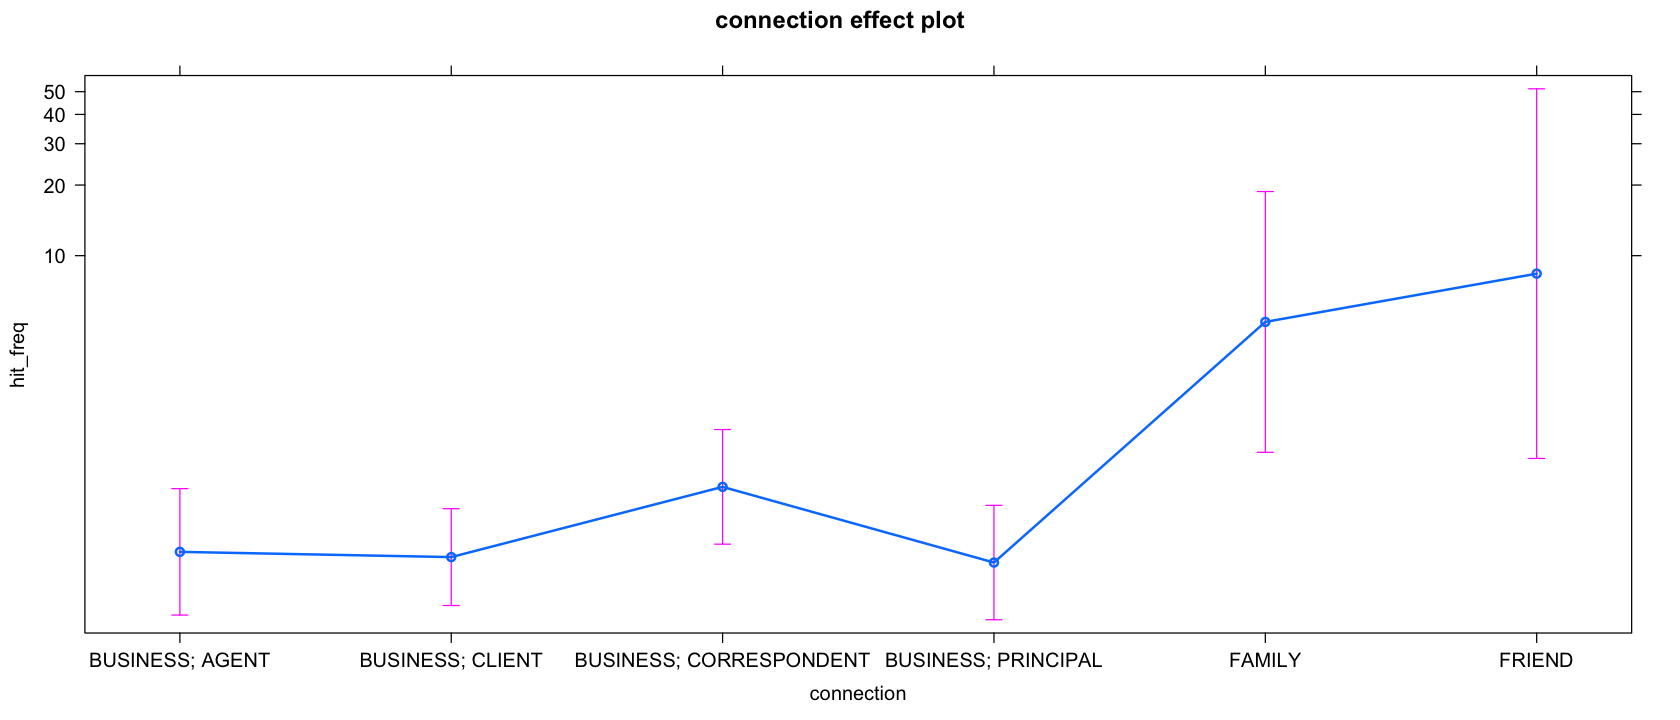

In [196]:
m_glmer2b <- glmer(hit_freq ~ connection + (1|sender) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2b)

"------------------------------drop1------------------------------"
drop1(m_glmer2b, test = "Chisq")

effect("connection", m_glmer2b)

plot(effect("connection", m_glmer2b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | pair) + (1 | quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
  1340.0   1377.5   -661.0   1322.0      467 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9726 -0.5688 -0.4657  0.3160  3.2662 

Random effects:
 Groups       Name        Variance Std.Dev.
 pair         (Intercept) 1.409    1.187   
 quinquennial (Intercept) 0.000    0.000   
Number of obs: 476, groups:  pair, 185; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.6731     0.2815  -2.391  0.01681 * 
connectionBUSINESS; CLIENT          0.1343     0.3601   0.373  0.70929   
connectionBUSINESS; CORRESPONDENT   0.5130     0.4165   1.232  0.21806   
connectionBUSINESS; PRINCIPAL      -0.1662   

[1] "------------------------------dispersion------------------------------"

[1] 1.004583

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1340.032,NA,NA
connection,5,1348.387,18.3555,0.002532334



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5101161               0.5834179               0.8520532 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4320156               4.1094483               8.3818667 

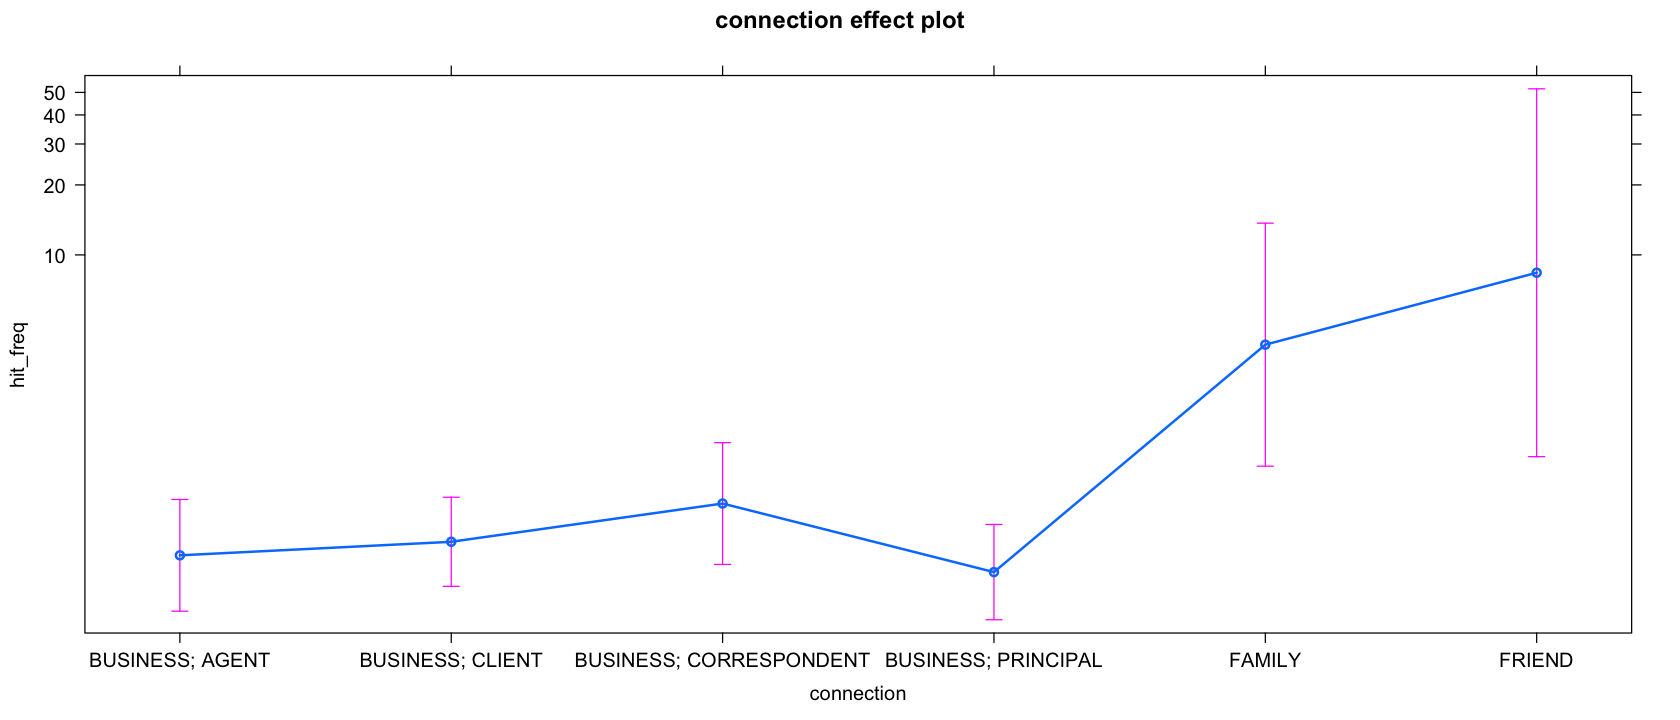

In [197]:
m_glmer2c <- glmer(hit_freq ~ connection + (1|pair) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2c)

"------------------------------drop1------------------------------"
drop1(m_glmer2c, test = "Chisq")

effect("connection", m_glmer2c)

plot(effect("connection", m_glmer2c))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | pair) + (1 | year)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
  1340.0   1377.5   -661.0   1322.0      467 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9726 -0.5689 -0.4664  0.3168  3.2703 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 1.399    1.183   
 year   (Intercept) 0.000    0.000   
Number of obs: 476, groups:  pair, 185; year, 16

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.6714     0.2809  -2.390  0.01685 * 
connectionBUSINESS; CLIENT          0.1338     0.3594   0.372  0.70973   
connectionBUSINESS; CORRESPONDENT   0.5143     0.4156   1.237  0.21592   
connectionBUSINESS; PRINCIPAL      -0.1660     0.3693  -0.450  0.65301   
conn

[1] "------------------------------dispersion------------------------------"

[1] 1.005098

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1340.031,NA,NA
connection,5,1348.387,18.3564,0.002531355



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5110124               0.5841521               0.8546250 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4328458               4.1225834               8.3833464 

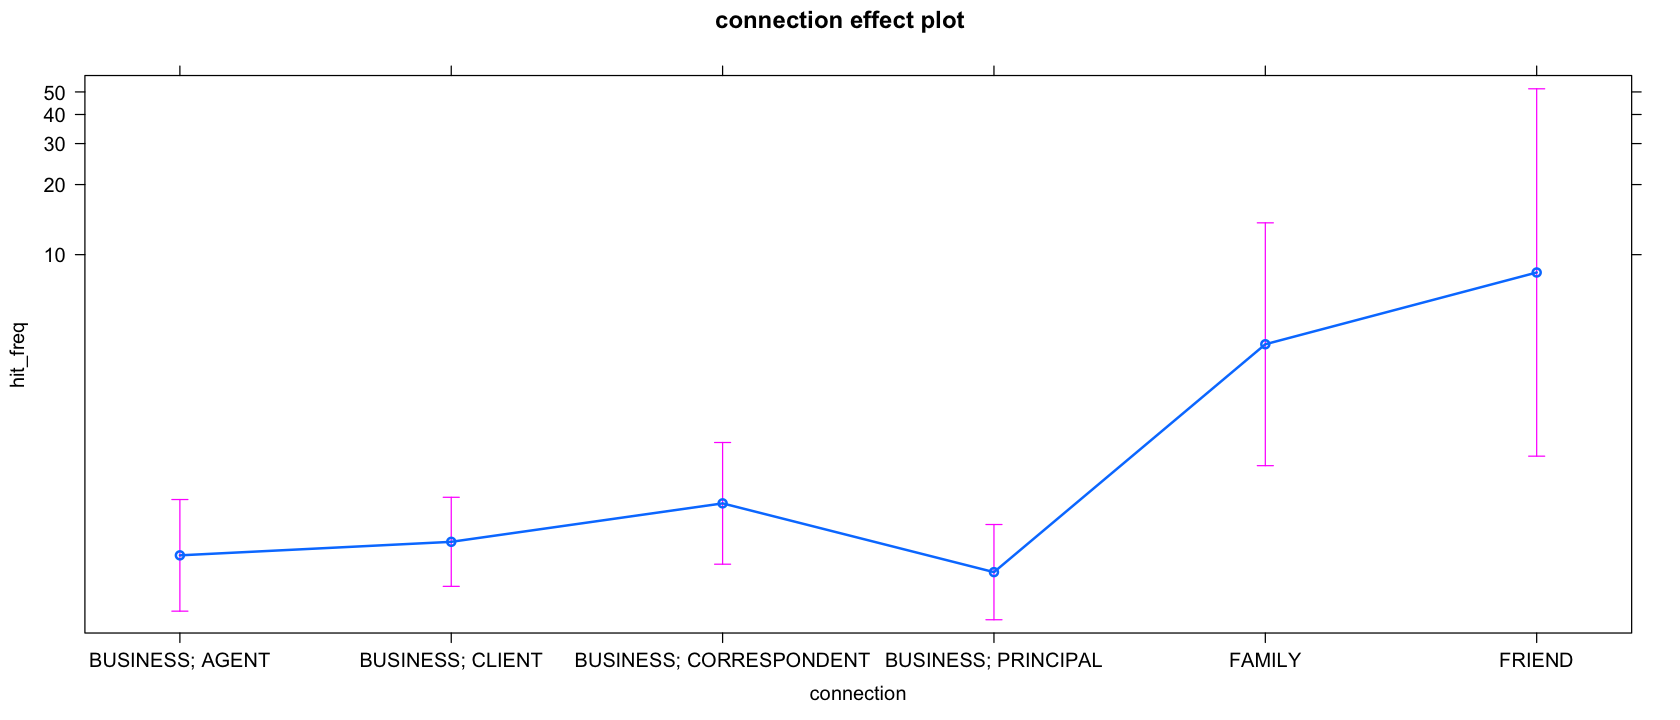

In [198]:
m_glmer2d <- glmer(hit_freq ~ connection + (1|pair) + (1|year),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2d)

"------------------------------drop1------------------------------"
drop1(m_glmer2d, test = "Chisq")

effect("connection", m_glmer2d)

plot(effect("connection", m_glmer2d))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | pair)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
  1338.0   1371.4   -661.0   1322.0      468 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9726 -0.5689 -0.4664  0.3168  3.2703 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 1.399    1.183   
Number of obs: 476, groups:  pair, 185

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.6716     0.2809  -2.391  0.01681 * 
connectionBUSINESS; CLIENT          0.1340     0.3594   0.373  0.70924   
connectionBUSINESS; CORRESPONDENT   0.5137     0.4156   1.236  0.21639   
connectionBUSINESS; PRINCIPAL      -0.1658     0.3693  -0.449  0.65347   
connectionFAMILY                    2.0881     0.6726   3.105  0.

[1] "------------------------------dispersion------------------------------"

[1] 1.005097

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1338.037,NA,NA
connection,5,1346.387,18.34967,0.002538639



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5108917               0.5841511               0.8539490 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4328448               4.1225670               8.3833446 

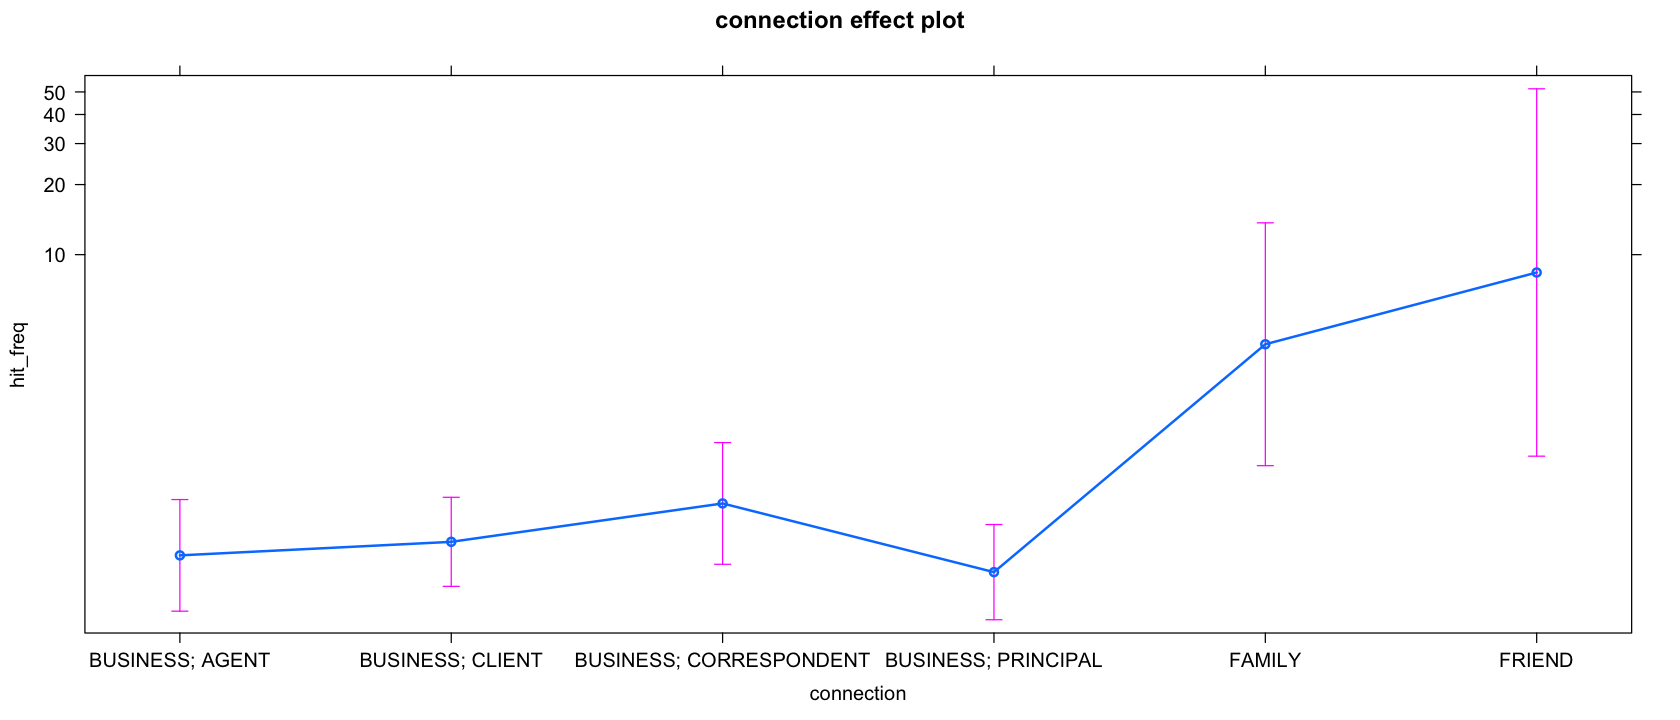

In [199]:
m_glmer2e <- glmer(hit_freq ~ connection + (1|pair),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2e)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2e)

"------------------------------drop1------------------------------"
drop1(m_glmer2e, test = "Chisq")

effect("connection", m_glmer2e)

plot(effect("connection", m_glmer2e))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Variations of the same model with different random effects (sender-addressee pairs instead of individual senders, added random temporal effect) do not yield more reliable models or models that better fit the first variation with "connection" as fixed effect and "sender" as random effect.

### Before going further

Apart from the addressee_over_40 column, The following operations will result in problems for the models, and the mixed effect models in particular; removing the "UNK" and "MULT" values from the following variables causes perfect separations, infinite p-values, and perfect correlations. The sole exception is the "addressee_over_40" variable. 

The cause is the range of "sender" factors relative to the number of objects within the dataset. "sender" has 138 factor levels on a dataset of 481 objects. The scarcity of the data combined with the high number of senders probably renders the models unable to produce meaningful estimations. Compared to the Jeake dataset, there are 33 sender factor levels on a dataset of 277 objects.

Filtering the dataset to reduce the number of sender factor levels alleviates the problem: another notebook has been created, "marescoe-david_filtered-connections_stats", that includes only senders who have at least 5 entries (written letters) in the dataset. Using this treshold resulted in 28 factor levels on a dataset of 273 objects, a similar count to the Jeake dataset, which makes mixed effects models using "sender" as a random effect possible.

The experiments are still listed below for completeness' sake.

In [200]:
# remove "MULT" and "UNK" values from sender_over_40 column
m_conn_old <- marescoe_conn[!(marescoe_conn$sender_is_older %in% c("MULT", "UNK")),  ]
m_conn_old$sender_is_older <- droplevels(m_conn_old$sender_is_older)

# remove "MULT" and "UNK" values from sender_over_40 column
m_conn_se40 <- marescoe_conn[!(marescoe_conn$sender_over_40 %in% c("MULT", "UNK")),  ]
m_conn_se40$sender_over_40 <- droplevels(m_conn_se40$sender_over_40)


# remove "MULT" and "UNK" values from addressee_over_40 column
m_conn_ad40 <- marescoe_conn[!(marescoe_conn$addressee_over_40 %in% c("MULT", "UNK")),  ]
m_conn_ad40$addressee_over_40 <- droplevels(m_conn_ad40$addressee_over_40)

# remove "UNK" values from age_gap_over_20 column
m_conn_gap <- marescoe_conn[marescoe_conn$age_gap_over_20 != "UNK", ]
m_conn_gap$age_gap_over_20 <- droplevels(m_conn_gap$age_gap_over_20)

# remove "FEMALE-MULT" and "MALE-MULT" values from gender_pair column
m_conn_gender <- marescoe_conn[!(marescoe_conn$gender_pair %in% c("FEMALE-MULT", "MALE-MULT")),  ]
m_conn_gender$gender_pair <- droplevels(m_conn_gender$gender_pair)

In [201]:
levels(m_conn_old$sender_is_older)
levels(m_conn_se40$sender_over_40)
levels(m_conn_ad40$addressee_over_40)
levels(m_conn_gap$age_gap_over_20)
levels(m_conn_gender$gender_pair)

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

[1] "FEMALE-FEMALE" "FEMALE-MALE"   "MALE-FEMALE"   "MALE-MALE"

### 4.1 Generalised linear mixed-effects model using "connection" and "age_gap_over_20" as fixed effects and "sender" as a random effect, negative binomial

In [144]:
m_glmer3 <- glmer(hit_freq ~ connection + age_gap_over_20 + (1|sender),
                  data=m_conn_gap,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer3)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer3)

"------------------------------drop1------------------------------"
drop1(m_glmer3, test = "Chisq")

effect("connection", m_glmer3)
effect("age_gap_over_20", m_glmer3)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + age_gap_over_20 + (1 | sender)
   Data: m_conn_gap

     AIC      BIC   logLik deviance df.resid 
   458.8    484.6   -221.4    442.8      177 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8932 -0.5797 -0.5042  0.4333  4.3251 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.6917   0.8317  
Number of obs: 185, groups:  sender, 39

Fixed effects:
                                    Estimate Std. Error z value Pr(>|z|)
(Intercept)                         -20.7922 14037.0074  -0.001    0.999
connectionBUSINESS; CLIENT           20.4488 14037.0074   0.001    0.999
connectionBUSINESS; CORRESPONDENT    20.9317 14037.0074   0.001    0.999
connectionBUSINESS; PRINCIPAL        20.4368 14037.0074   0.001    0.999
connectionFAMILY                     22.7175 14037.0

[1] "------------------------------dispersion------------------------------"

[1] 0.999565

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,458.8080,NA,NA
connection,4,457.2084,6.4004145,0.1711742
age_gap_over_20,1,457.7088,0.9007815,0.3425722



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
           7.988785e-10            6.071114e-01            9.840229e-01 
    BUSINESS; PRINCIPAL                  FAMILY 
           5.998609e-01            5.868771e+00 


 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.6077243 0.3377128 

### 4.2 Generalised linear model using "connection" and "age_gap_over_20" as predictors, quasipoisson

In [146]:
m_glm3b <- glm(hit_freq ~ connection + age_gap_over_20,
                  data=m_conn_gap,
                  family=quasipoisson)
summary(m_glm3b)

"------------------------------dispersion------------------------------"
442.87 / 179

"------------------------------drop1------------------------------"
drop1(m_glm3b, test = "Chisq")

effect("connection", m_glm3b)
effect("age_gap_over_20", m_glm3b)


Call:
glm(formula = hit_freq ~ connection + age_gap_over_20, family = quasipoisson, 
    data = m_conn_gap)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7170  -1.2772  -0.9227   0.7927   6.2464  

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)                       -14.3026   993.3538  -0.014    0.989  
connectionBUSINESS; CLIENT         14.1795   993.3539   0.014    0.989  
connectionBUSINESS; CORRESPONDENT  15.1748   993.3539   0.015    0.988  
connectionBUSINESS; PRINCIPAL      14.0988   993.3539   0.014    0.989  
connectionFAMILY                   16.7118   993.3539   0.017    0.987  
age_gap_over_20TRUE                -0.7310     0.4395  -1.663    0.098 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 3.296087)

    Null deviance: 564.09  on 184  degrees of freedom
Residual deviance: 442.87  on 179  degrees of freedom
AIC: N

[1] "------------------------------dispersion------------------------------"

[1] 2.474134

[1] "------------------------------drop1------------------------------"

,Df,Deviance,scaled dev.,Pr(>Chi)
<none>,NA,442.8676,NA,NA
connection,4,538.9713,29.156917,7.264076e-06
age_gap_over_20,1,453.5170,3.230946,7.225892e-02



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
           5.062634e-07            7.285589e-01            1.971041e+00 
    BUSINESS; PRINCIPAL                  FAMILY 
           6.720357e-01            9.166643e+00 


 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.8201446 0.3948289 

The problem persist even when using a simplified model.

### 4.3 Generalised linear mixed-effects model using only "age_gap_over_20" as a fixed effect and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ age_gap_over_20 + (1 | sender)
   Data: m_conn_gap

     AIC      BIC   logLik deviance df.resid 
   457.2    470.1   -224.6    449.2      181 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8797 -0.5786 -0.4947  0.3695  4.1108 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 1.211    1.101   
Number of obs: 185, groups:  sender, 39

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)          -0.2810     0.2522  -1.114    0.265
age_gap_over_20TRUE  -0.6678     0.6984  -0.956    0.339

Correlation of Fixed Effects:
            (Intr)
ag___20TRUE -0.354

[1] "------------------------------dispersion------------------------------"

[1] 0.9887765

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,457.2084,NA,NA
age_gap_over_20,1,455.9317,0.723298,0.3950642



 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.7550597 0.3872346 

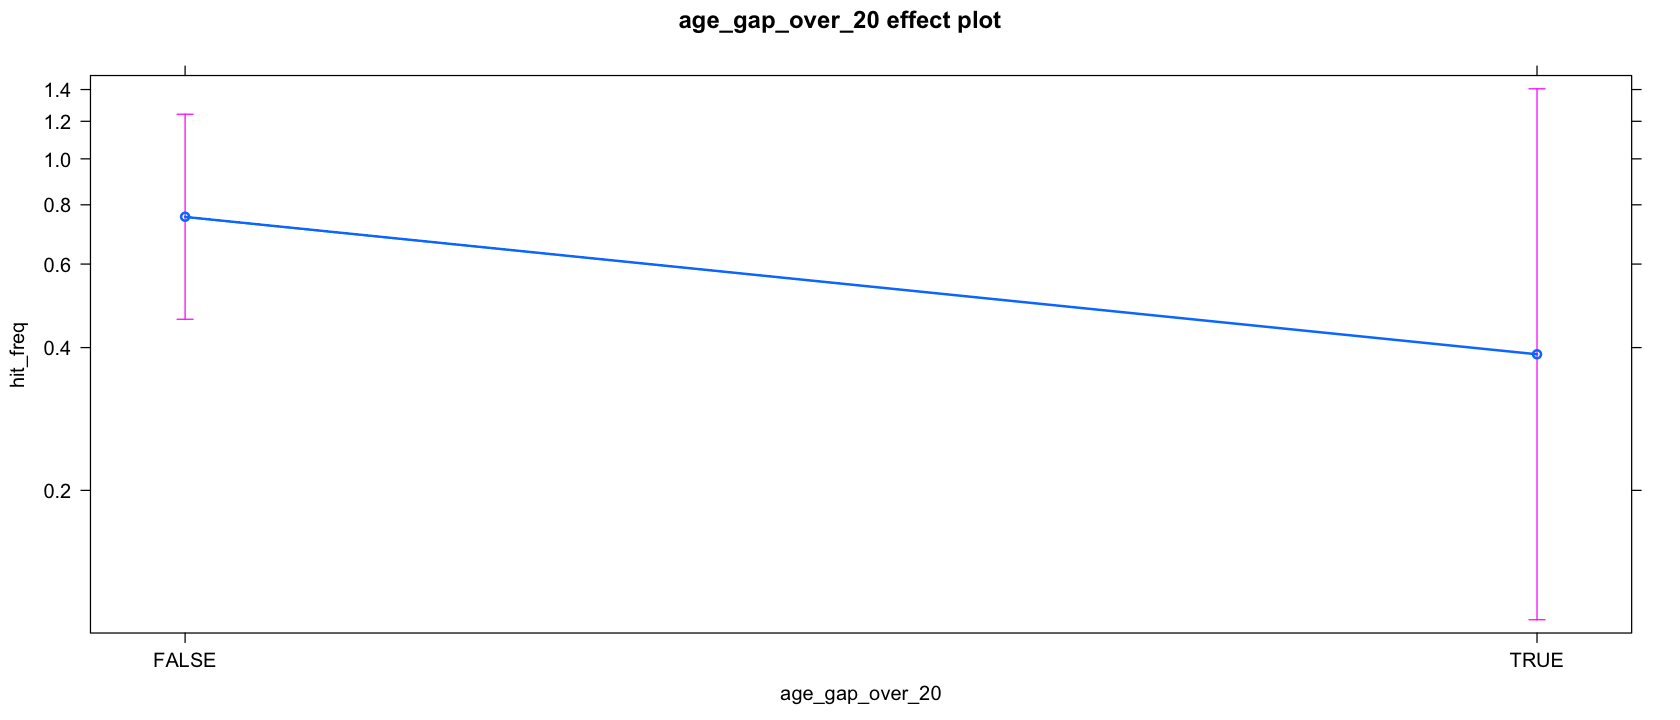

In [203]:
m_glmer3c <- glmer(hit_freq ~ age_gap_over_20 + (1|sender),
                  data=m_conn_gap,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer3c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer3c)

"------------------------------drop1------------------------------"
drop1(m_glmer3c, test = "Chisq")

effect("age_gap_over_20", m_glmer3c)

plot(effect("age_gap_over_20", m_glmer3c))

"age_gap_over_20" is not a significant predictor for the number of divine appeals.

### 5.1 Generalised linear mixed-effects model using "connection" and "sender is older" as fixed effects, negative binomial

In [152]:
m_glmer4 <- glmer(hit_freq ~ connection + sender_is_older + (1|sender),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4)

"------------------------------drop1------------------------------"
drop1(m_glmer4, test = "Chisq")

effect("connection", m_glmer4)
effect("sender_is_older", m_glmer4)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_is_older + (1 | sender)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   474.5    500.3   -229.2    458.5      179 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8885 -0.5941 -0.4952  0.3620  3.8814 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.8501   0.922   
Number of obs: 187, groups:  sender, 43

Fixed effects:
                                    Estimate Std. Error z value Pr(>|z|)
(Intercept)                         -20.6100 14034.0776  -0.001    0.999
connectionBUSINESS; CLIENT           20.3601 14034.0776   0.001    0.999
connectionBUSINESS; CORRESPONDENT    20.8885 14034.0777   0.001    0.999
connectionBUSINESS; PRINCIPAL        20.2750 14034.0776   0.001    0.999
connectionFAMILY                     22.6034 14034.0

[1] "------------------------------dispersion------------------------------"

[1] 0.992773

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,474.4919,NA,NA
connection,4,472.5929,6.1010278,0.1917294
sender_is_older,1,472.6456,0.1537122,0.6950128



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
           9.772618e-10            6.796728e-01            1.152803e+00 
    BUSINESS; PRINCIPAL                  FAMILY 
           6.242019e-01            6.405638e+00 


 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.6434872 0.5364027 

### 5.2 Generalised linear mixed-effects model using "sender_is_older" as a fixed effect and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ sender_is_older + (1 | sender)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   472.6    485.5   -232.3    464.6      183 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8836 -0.5582 -0.4893  0.3134  3.7870 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 1.423    1.193   
Number of obs: 187, groups:  sender, 43

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)          -0.1513     0.3651  -0.414    0.679
sender_is_olderTRUE  -0.2868     0.4581  -0.626    0.531

Correlation of Fixed Effects:
            (Intr)
sndr_s_TRUE -0.754

[1] "------------------------------dispersion------------------------------"

[1] 0.9799771

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,472.5929,NA,NA
sender_is_older,1,470.9018,0.3088768,0.5783702



 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.8595617 0.6452140 

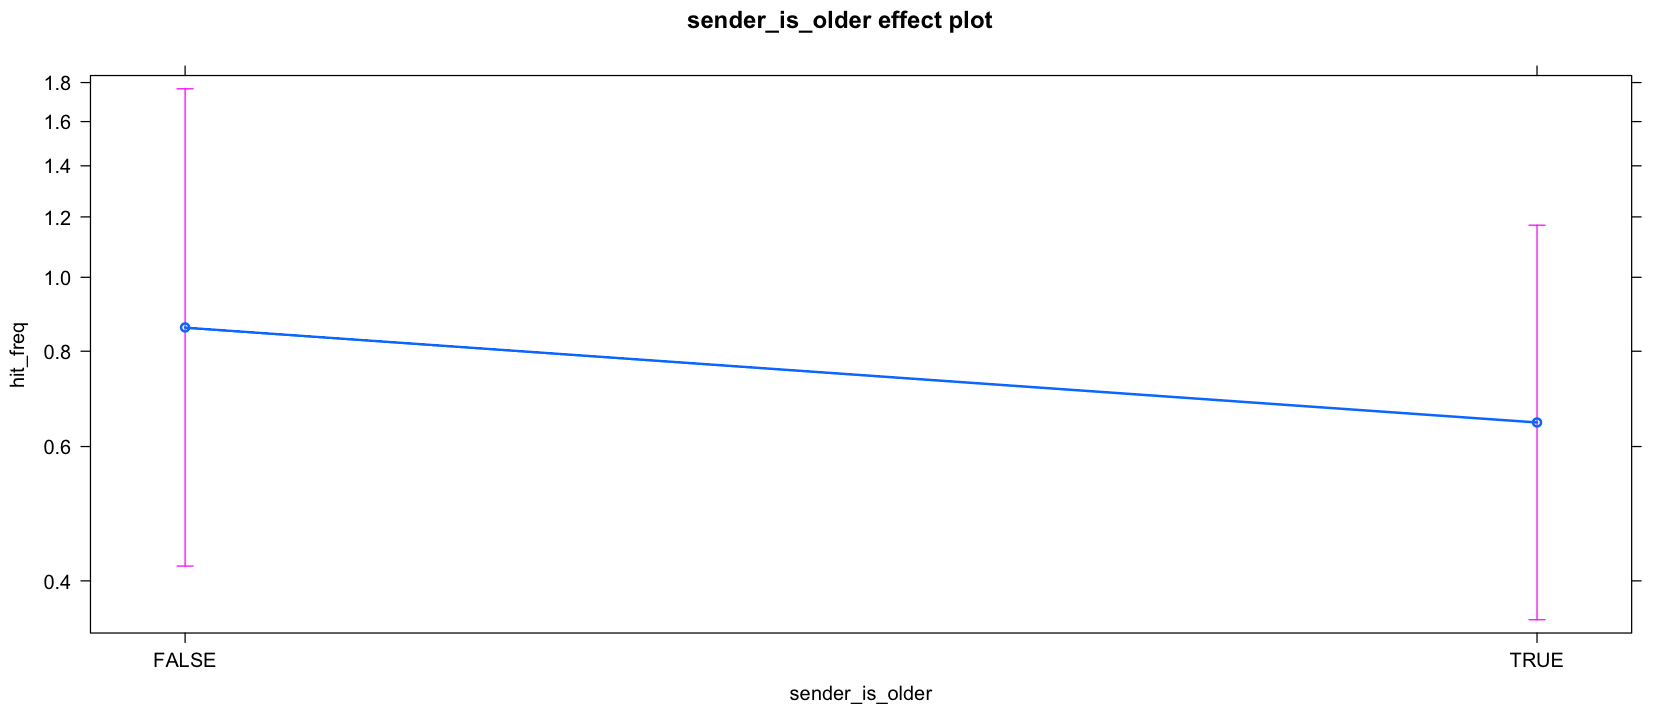

In [204]:
m_glmer4b <- glmer(hit_freq ~ sender_is_older + (1|sender),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4b)

"------------------------------drop1------------------------------"
drop1(m_glmer4b, test = "Chisq")

effect("sender_is_older", m_glmer4b)

plot(effect("sender_is_older", m_glmer4b))

"sender_is_older" is not a significant predictor.

### 5.3 Generalised linear mixed-effects model using "sender_is_older" as a fixed effect and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ sender_is_older + (1 | sender) + (1 | quinquennial)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   474.6    490.7   -232.3    464.6      182 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8836 -0.5583 -0.4893  0.3134  3.7868 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 1.423    1.193   
 quinquennial (Intercept) 0.000    0.000   
Number of obs: 187, groups:  sender, 43; quinquennial, 4

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)          -0.1513     0.3651  -0.414    0.679
sender_is_olderTRUE  -0.2865     0.4581  -0.625    0.532

Correlation of Fixed Effects:
            (Intr)
sndr_s_TRUE -0.754

[1] "------------------------------dispersion------------------------------"

[1] 0.9799849

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,474.5920,NA,NA
sender_is_older,1,472.9009,0.3089254,0.5783404



 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.8596144 0.6454921 

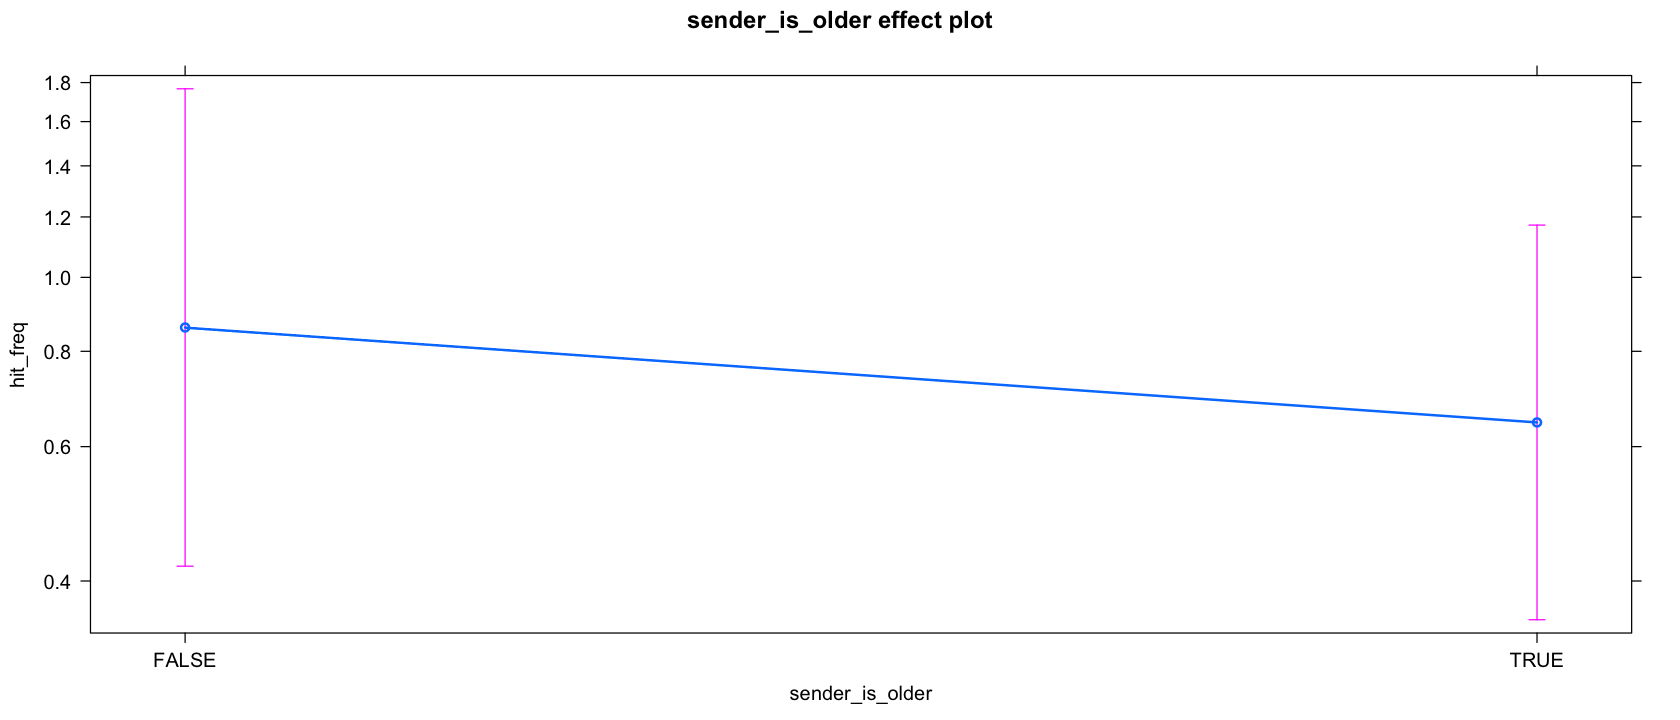

In [207]:
m_glmer4c <- glmer(hit_freq ~ sender_is_older + (1|sender) + (1|quinquennial),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4c)

"------------------------------drop1------------------------------"
drop1(m_glmer4c, test = "Chisq")

effect("sender_is_older", m_glmer4c)

plot(effect("sender_is_older", m_glmer4c))

This model is a slightly worse fit and the variance and standard deviation of the quinquennial mixed effect is zero.

### 6.1 Generalised linear mixed-effects model using "connection" and "sender_over_40" as fixed effects, and "sender" as a random effect, negative binomial

In [169]:
m_glmer5 <- glmer(hit_freq ~ connection + sender_over_40 + (1|sender),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5)

"------------------------------drop1------------------------------"
drop1(m_glmer5, test = "Chisq")

effect("connection", m_glmer5)
effect("sender_over_40", m_glmer5)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_over_40 + (1 | sender)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   463.1    488.9   -223.6    447.1      177 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8891 -0.5971 -0.4902  0.3990  3.9077 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.7294   0.8541  
Number of obs: 185, groups:  sender, 42

Fixed effects:
                                    Estimate Std. Error z value Pr(>|z|)
(Intercept)                         -20.5426 14034.0071  -0.001    0.999
connectionBUSINESS; CLIENT           20.3278 14034.0071   0.001    0.999
connectionBUSINESS; CORRESPONDENT    20.7850 14034.0071   0.001    0.999
connectionBUSINESS; PRINCIPAL        20.2669 14034.0071   0.001    0.999
connectionFAMILY                     22.4477 14034.0

[1] "------------------------------dispersion------------------------------"

[1] 1.010246

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,463.1237,NA,NA
connection,4,460.6790,5.5552878,0.2349122
sender_over_40,1,461.4589,0.3351701,0.5626305



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
           1.009563e-09            6.798013e-01            1.073875e+00 
    BUSINESS; PRINCIPAL                  FAMILY 
           6.396156e-01            5.663180e+00 


 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.6726014 0.5241583 

### 5.2 Generalised linear mixed-effects model using "sender_over_40" as a fixed effect and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ sender_over_40 + (1 | sender)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   460.7    473.6   -226.3    452.7      181 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8817 -0.5937 -0.4738  0.3574  3.8578 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 1.15     1.073   
Number of obs: 185, groups:  sender, 42

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.03514    0.30553  -0.115    0.908
sender_over_40TRUE -0.49714    0.40640  -1.223    0.221

Correlation of Fixed Effects:
            (Intr)
snd__40TRUE -0.679

[1] "------------------------------dispersion------------------------------"

[1] 1.000844

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,460.6790,NA,NA
sender_over_40,1,459.9283,1.24931,0.2636842



 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.9654713 0.5872637 

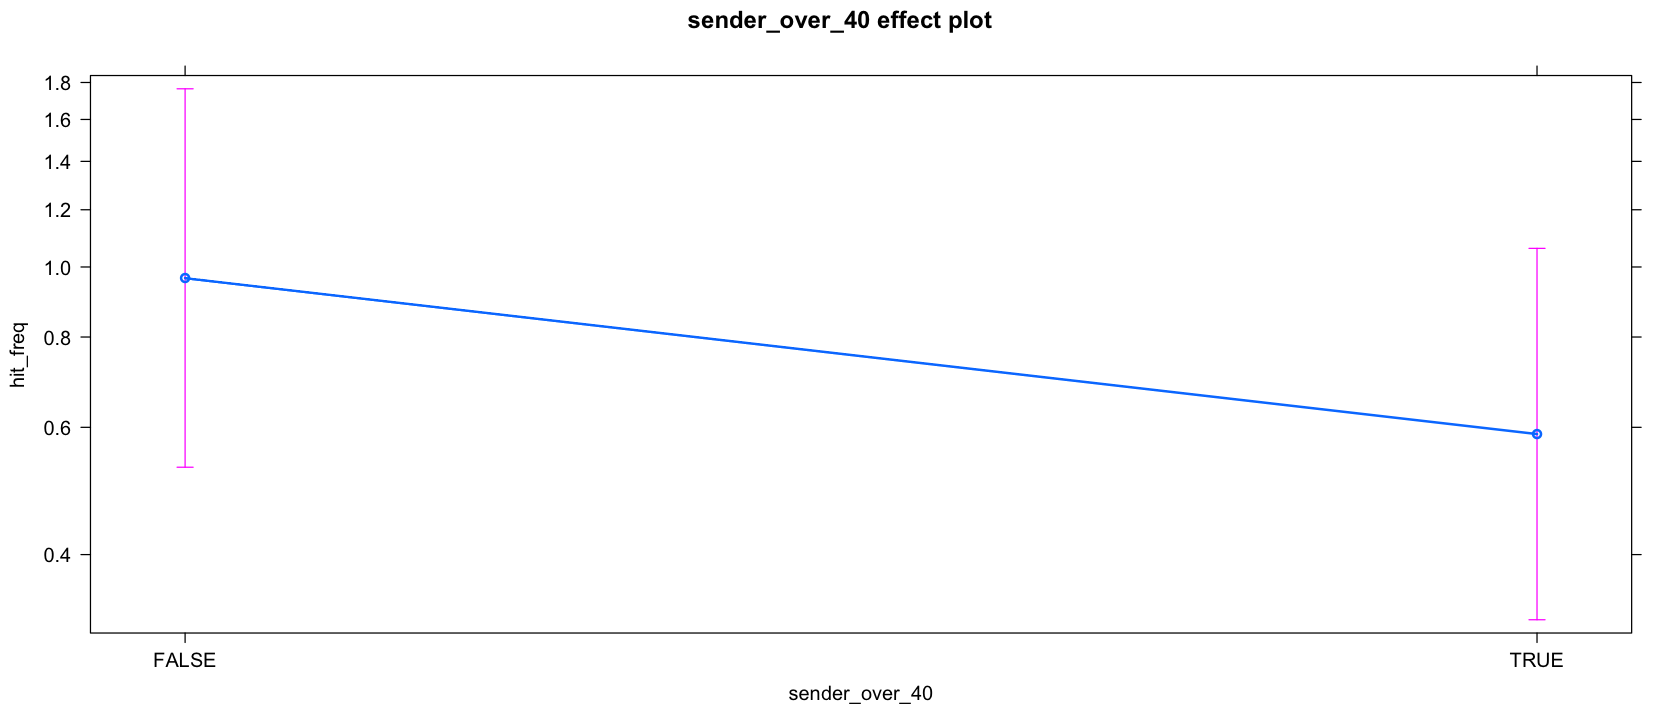

In [205]:
m_glmer5b <- glmer(hit_freq ~ sender_over_40 + (1|sender),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5b)

"------------------------------drop1------------------------------"
drop1(m_glmer5b, test = "Chisq")

effect("sender_over_40", m_glmer5b)

plot(effect("sender_over_40", m_glmer5b))

"sender_over_40" is not a significant predictor.

### 6.3 Generalised linear mixed-effects model using "sender_is_over_40" as a fixed effect and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ sender_over_40 + (1 | sender) + (1 | quinquennial)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   462.7    478.8   -226.3    452.7      180 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8818 -0.5936 -0.4737  0.3563  3.8576 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 1.159    1.077   
 quinquennial (Intercept) 0.000    0.000   
Number of obs: 185, groups:  sender, 42; quinquennial, 4

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.03692    0.30621  -0.121    0.904
sender_over_40TRUE -0.49627    0.40726  -1.219    0.223

Correlation of Fixed Effects:
            (Intr)
snd__40TRUE -0.679

[1] "------------------------------dispersion------------------------------"

[1] 1.000427

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,462.6796,NA,NA
sender_over_40,1,461.9268,1.247208,0.2640864



 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.9637565 0.5867333 

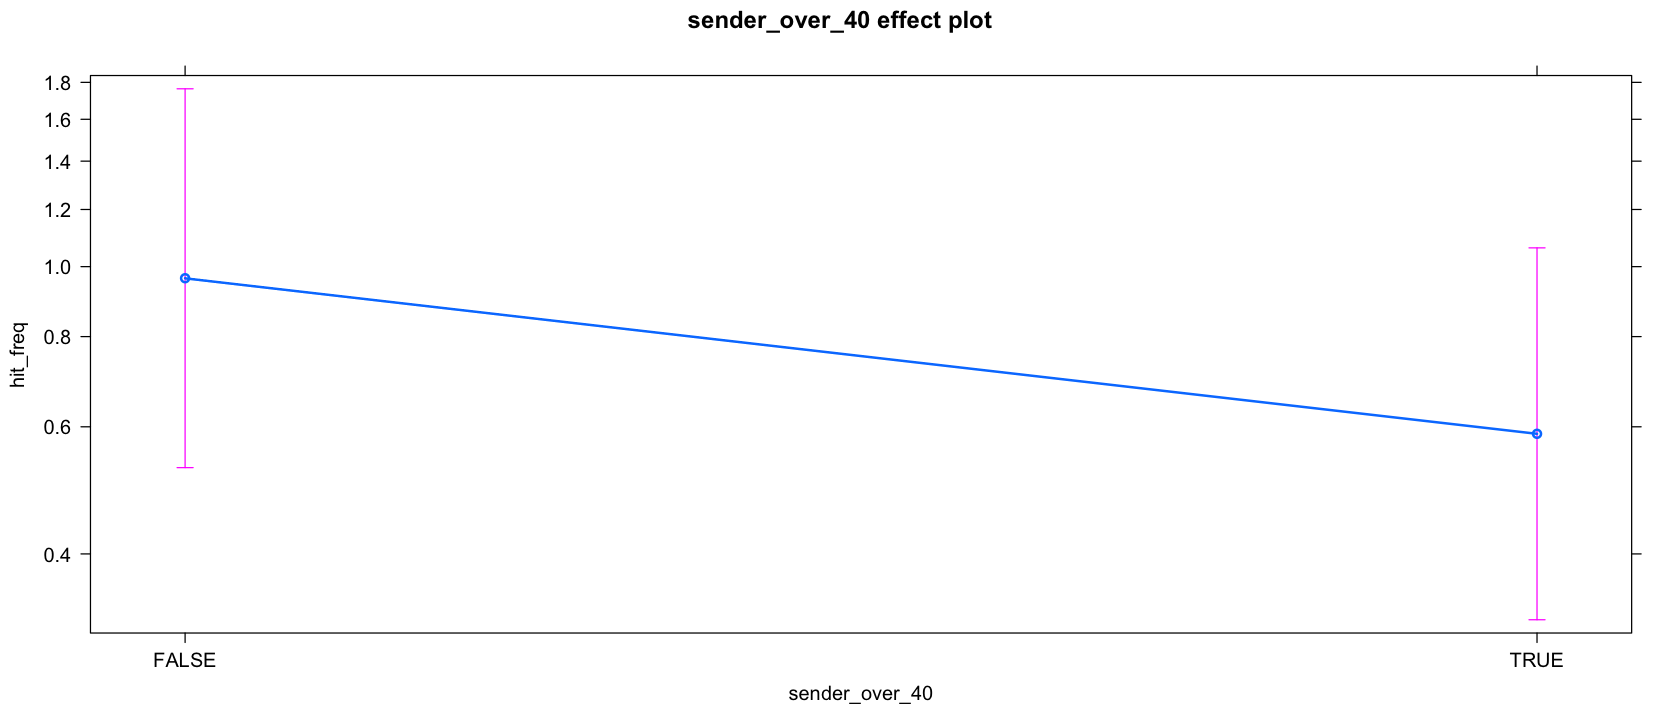

In [206]:
m_glmer5c <- glmer(hit_freq ~ sender_over_40 + (1|sender) + (1|quinquennial),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5c)

"------------------------------drop1------------------------------"
drop1(m_glmer5c, test = "Chisq")

effect("sender_over_40", m_glmer5c)

plot(effect("sender_over_40", m_glmer5c))

This model has higher AIC score, quinquennial variance and standard deviation are zero.

### 6.1 Generalised linear mixed-effects model using "connection" and "addressee_over_40" as fixed effects, and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + addressee_over_40 + (1 | sender)
   Data: m_conn_ad40

     AIC      BIC   logLik deviance df.resid 
  1325.6   1363.0   -653.8   1307.6      465 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9539 -0.5916 -0.4691  0.2563  3.9332 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 1.376    1.173   
Number of obs: 474, groups:  sender, 135

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.5722     0.3169  -1.805  0.07100 . 
connectionBUSINESS; CLIENT         -0.0435     0.4002  -0.109  0.91343   
connectionBUSINESS; CORRESPONDENT   0.6443     0.4279   1.506  0.13212   
connectionBUSINESS; PRINCIPAL      -0.1308     0.4258  -0.307  0.75878   
connectionFAMILY                    2.2288 

[1] "------------------------------dispersion------------------------------"

[1] 1.013484

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1325.598,NA,NA
connection,5,1335.636,20.0384641,0.001229129
addressee_over_40,1,1324.279,0.6809478,0.409260551



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5576406               0.5339015               1.0620813 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4892933               5.1799867               8.2884680 


 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.6495008 0.3706318 

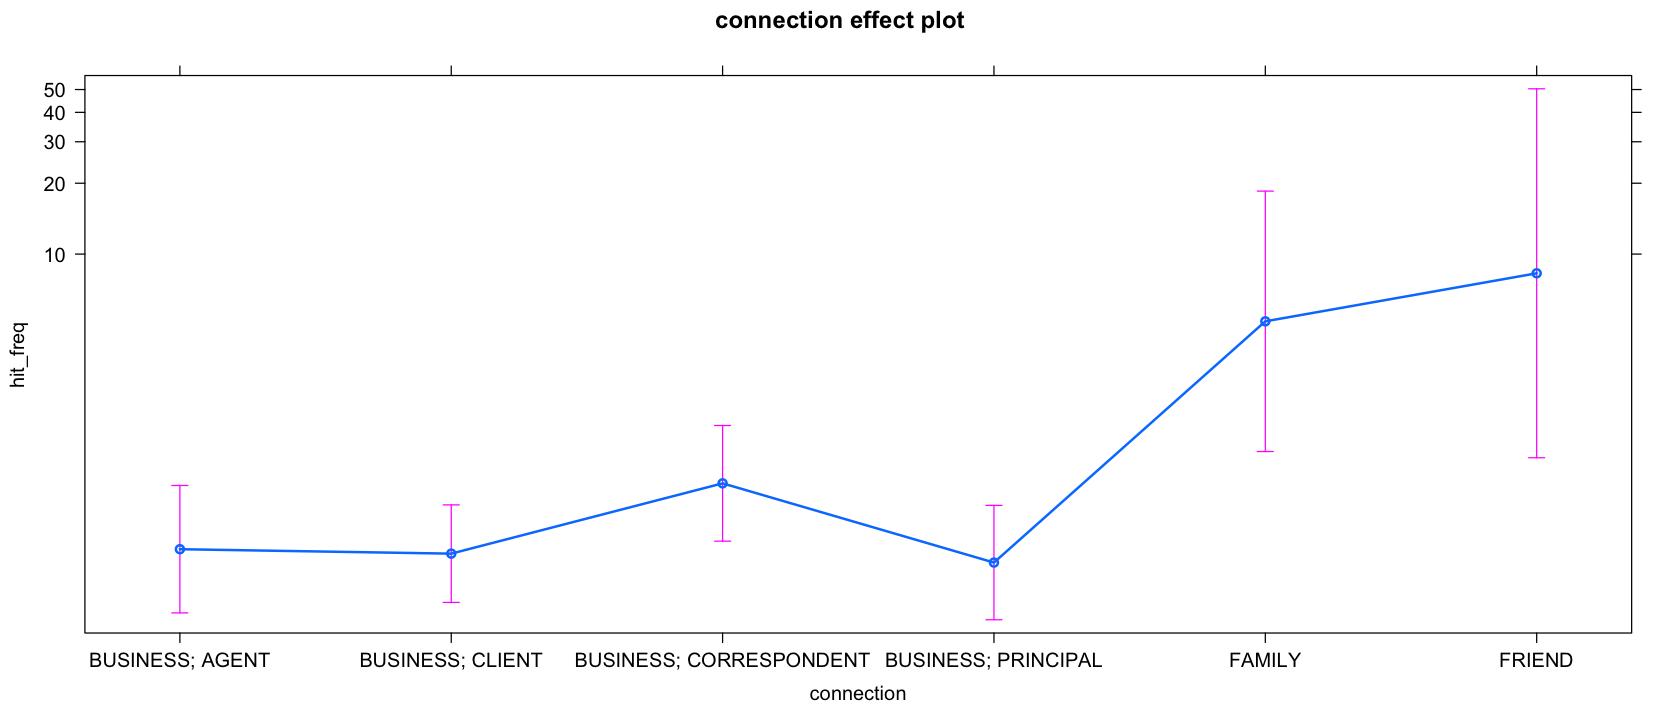

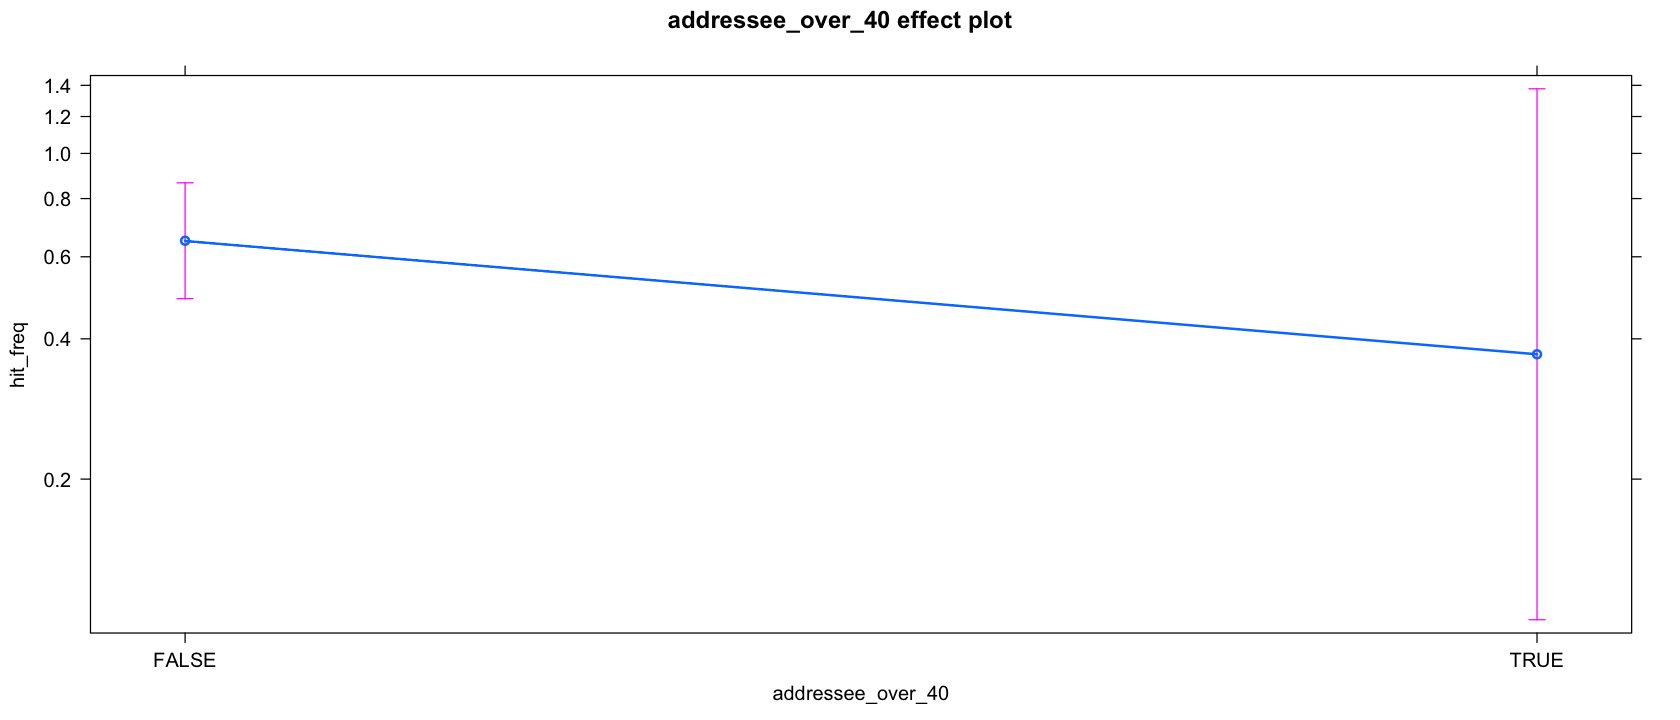

In [208]:
m_glmer6 <- glmer(hit_freq ~ connection + addressee_over_40 + (1|sender),
                  data=m_conn_ad40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6)

"------------------------------drop1------------------------------"
drop1(m_glmer6, test = "Chisq")

effect("connection", m_glmer6)
effect("addressee_over_40", m_glmer6)

plot(effect("connection", m_glmer6))
plot(effect("addressee_over_40", m_glmer6))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

"addressee_over_40" is not a significant predictor.

### 6.2 Generalised linear mixed-effects model using "connection" and "addressee_over_40" as fixed effects, and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + addressee_over_40 + (1 | sender) + (1 |  
    quinquennial)
   Data: m_conn_ad40

     AIC      BIC   logLik deviance df.resid 
  1327.6   1369.2   -653.8   1307.6      464 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9539 -0.5916 -0.4691  0.2563  3.9332 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 sender       (Intercept) 1.376e+00 1.173e+00
 quinquennial (Intercept) 7.084e-15 8.417e-08
Number of obs: 474, groups:  sender, 135; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.57222    0.31693  -1.806  0.07099 . 
connectionBUSINESS; CLIENT        -0.04349    0.40016  -0.109  0.91345   
connectionBUSINESS; CORRESPONDENT  0.64424    0.42786   1.506  0.13214   
connectionB

[1] "------------------------------dispersion------------------------------"

[1] 1.013482

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1327.598,NA,NA
connection,5,1337.636,20.0380942,0.001229326
addressee_over_40,1,1326.279,0.6809607,0.409256114



 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5576301               0.5338972               1.0620299 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.4892884               5.1799267               8.2884595 


 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.6494907 0.3706251 

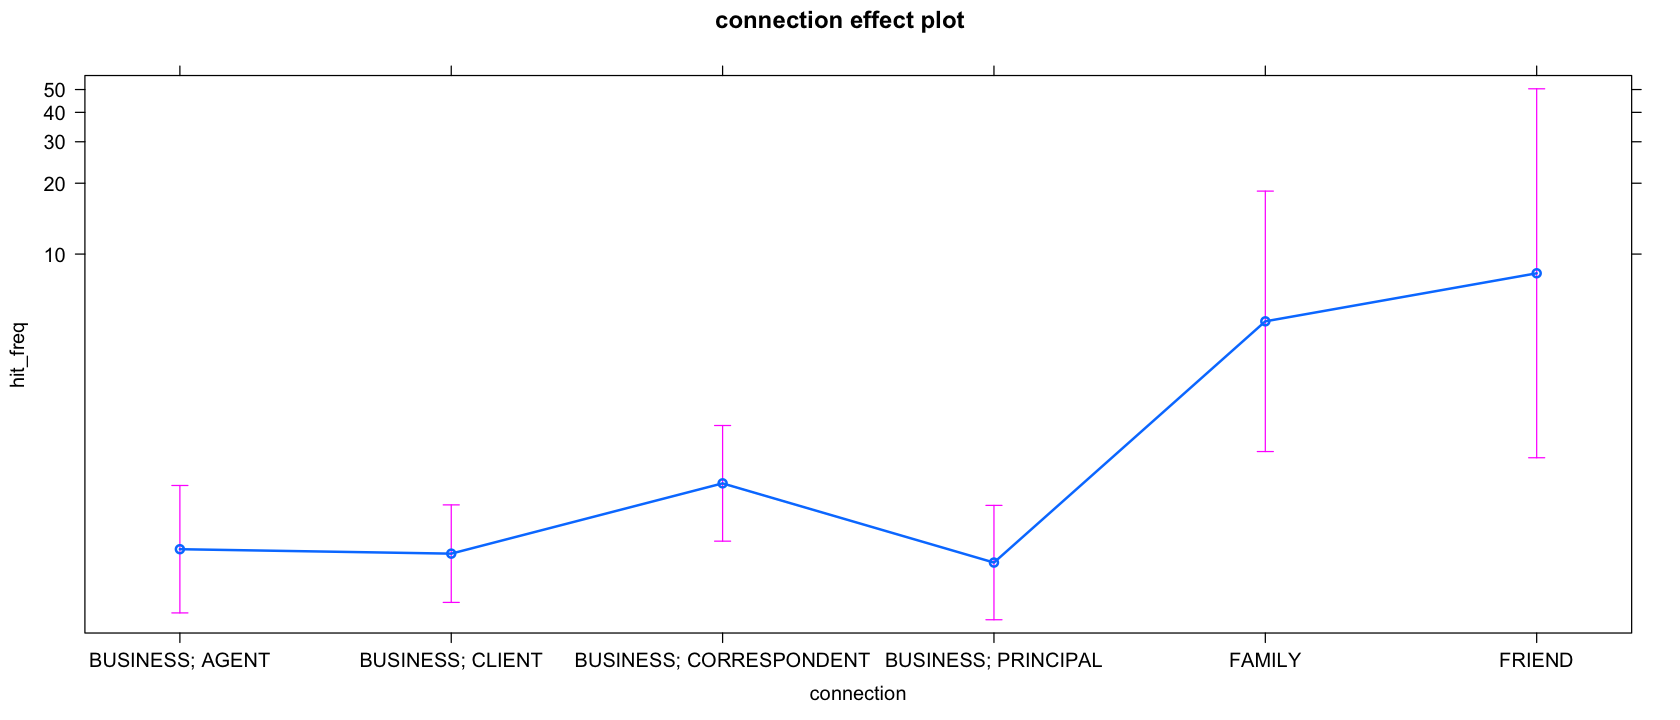

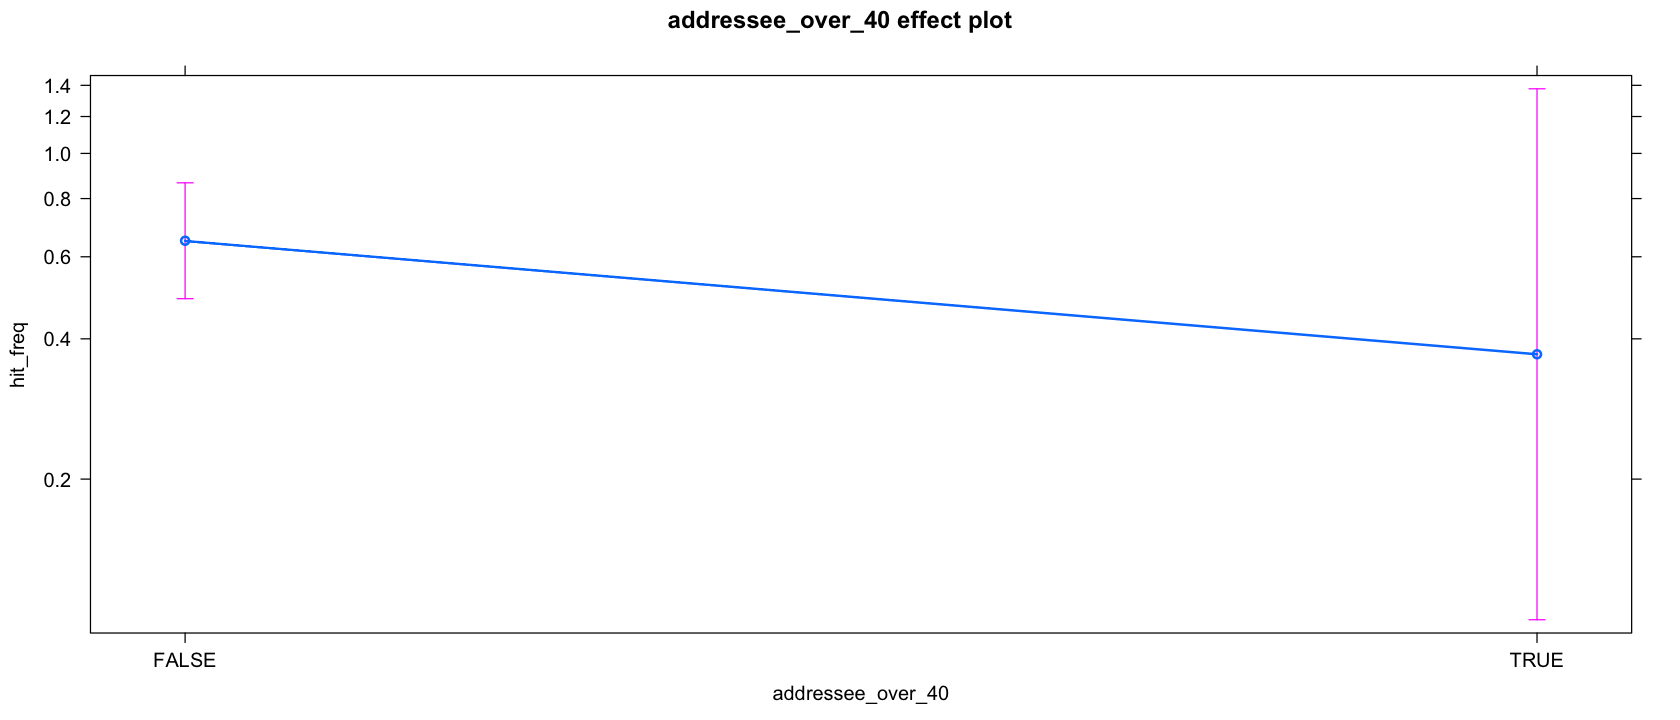

In [209]:
m_glmer6b <- glmer(hit_freq ~ connection + addressee_over_40 + (1|sender) + (1|quinquennial),
                  data=m_conn_ad40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6b)

"------------------------------drop1------------------------------"
drop1(m_glmer6b, test = "Chisq")

effect("connection", m_glmer6b)
effect("addressee_over_40", m_glmer6b)

plot(effect("connection", m_glmer6b))
plot(effect("addressee_over_40", m_glmer6b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

the model is worse than its simpler 6.1 counterpart.

### 6.3 Generalised linear mixed-effects model using "addressee_over_40" as a fixed effect, and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ addressee_over_40 + (1 | sender)
   Data: m_conn_ad40

     AIC      BIC   logLik deviance df.resid 
  1335.6   1352.3   -663.8   1327.6      470 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9489 -0.5249 -0.4527  0.2426  4.6145 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 2.195    1.482   
Number of obs: 474, groups:  sender, 135

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)            -0.4537     0.1653  -2.745  0.00605 **
addressee_over_40TRUE  -0.7805     0.6976  -1.119  0.26317   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
add__40TRUE -0.084

[1] "------------------------------dispersion------------------------------"

[1] 1.002093

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1335.636,NA,NA
addressee_over_40,1,1334.792,1.155585,0.2823832



 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.6352451 0.2910499 

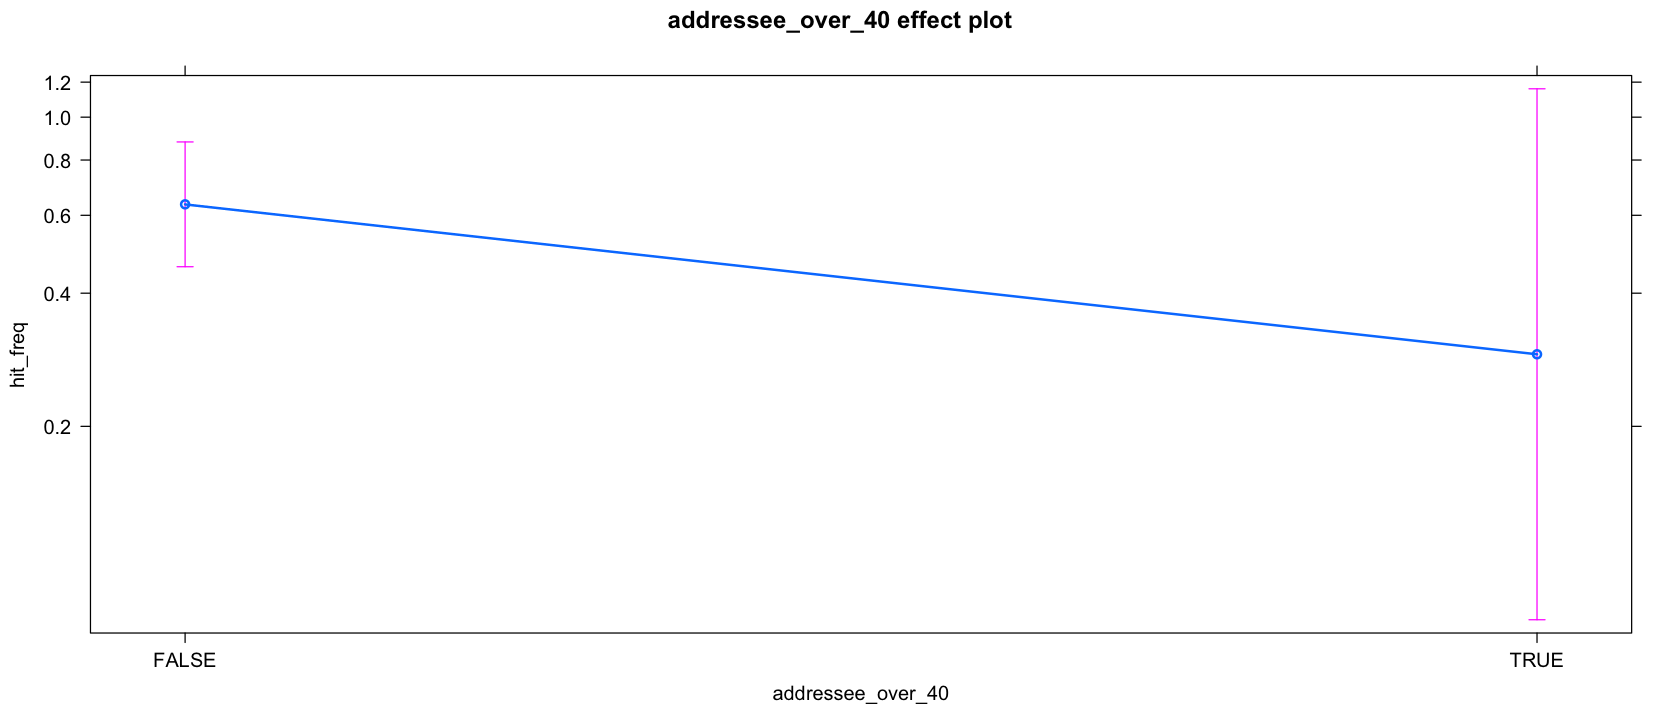

In [210]:
m_glmer6c <- glmer(hit_freq ~ addressee_over_40 + (1|sender),
                  data=m_conn_ad40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6c)

"------------------------------drop1------------------------------"
drop1(m_glmer6c, test = "Chisq")

effect("addressee_over_40", m_glmer6c)

plot(effect("addressee_over_40", m_glmer6c))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

"addressee_over_40" is not a significant predictor. Model 6.3 is a slightly worse fit than the 6.1 model.

### 7.1 Generalised linear model using "gender_pair" as a predictor, quasipoisson

In [182]:
m_glmer7 <- glm(hit_freq ~ gender_pair,
                   data=m_conn_gender,
                   family=quasipoisson)
summary(m_glmer7)

"------------------------------dispersion------------------------------"
2112.2 / 399

"------------------------------drop1------------------------------"
drop1(m_glmer7, test = "Chisq")

effect("gender_pair", m_glmer7)


Call:
glm(formula = hit_freq ~ gender_pair, family = quasipoisson, 
    data = m_conn_gender)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8543  -1.8543  -1.8543   0.0837  14.2811  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)              -12.30     967.82  -0.013    0.990
gender_pairFEMALE-MALE    11.83     967.82   0.012    0.990
gender_pairMALE-FEMALE    12.75     967.82   0.013    0.989
gender_pairMALE-MALE      12.84     967.82   0.013    0.989

(Dispersion parameter for quasipoisson family taken to be 11.55941)

    Null deviance: 2128.4  on 402  degrees of freedom
Residual deviance: 2112.2  on 399  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 10


[1] "------------------------------dispersion------------------------------"

[1] 5.293734

[1] "------------------------------drop1------------------------------"

,Df,Deviance,scaled dev.,Pr(>Chi)
<none>,NA,2112.182,NA,NA
gender_pair,3,2128.378,1.401099,0.7052771



 gender_pair effect
gender_pair
FEMALE-FEMALE   FEMALE-MALE   MALE-FEMALE     MALE-MALE 
 4.539993e-06  6.250000e-01  1.562653e+00  1.719145e+00 

The model is too complex for the little amount of data.

## Appendix: failed experiments

### Generalised linear model using "connection" and "gender_pair" as fixed effects, and "sender" as a random effect, negative binomial

In [49]:
m_glmer7 <- glmer(hit_freq ~ connection + gender_pair + (1|sender),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer7)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer7)

"------------------------------drop1------------------------------"
drop1(m_glmer7, test = "Chisq")

effect("connection", m_glmer7)
effect("gender_pair", m_glmer7)

ERROR: Error in (function (fr, X, reTrms, family, nAGQ = 1L, verbose = 0L, maxit = 100L, : Downdated VtV is not positive definite
